# Usage Examples

Here are examples for how to use the API to compute the connectivity measures of interest.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from spectral_connectivity import Connectivity, Multitaper, multitaper_connectivity
from spectral_connectivity.transforms import prepare_time_series

### Power Spectrum
#### 200 Hz signal

Text(0.5, 1.0, 'Frequency Domain')

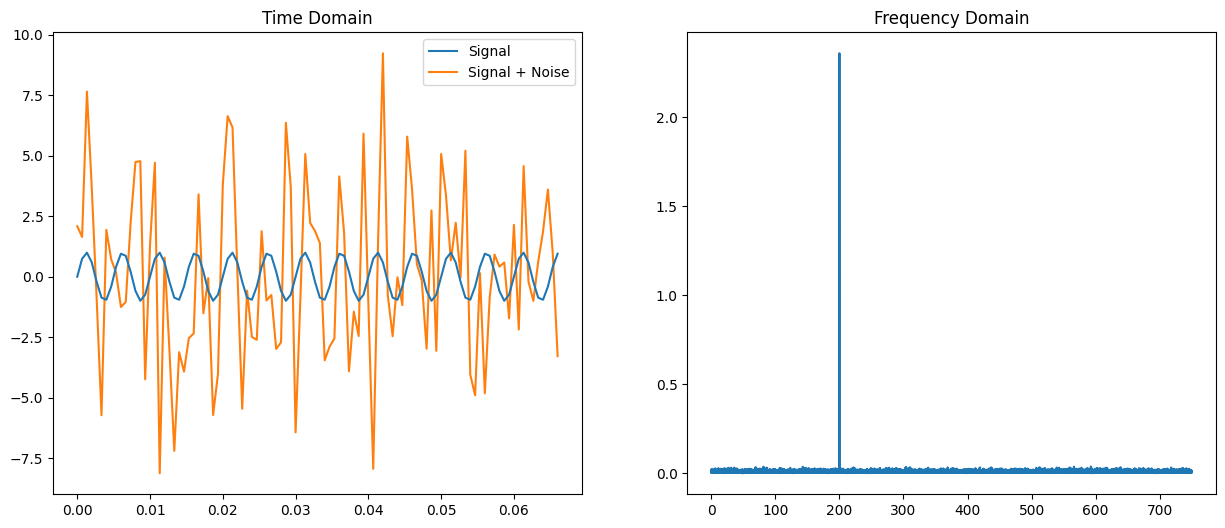

In [2]:
# Simulate signal with noise
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 50)
n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)
signal = np.sin(2 * np.pi * time * frequency_of_interest)
noise = np.random.normal(0, 4, len(signal))

# Plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(time[:100], signal[:100], label="Signal", zorder=3)
axes[0].plot(time[:100], signal[:100] + noise[:100], label="Signal + Noise")
axes[0].legend()
axes[0].set_title("Time Domain")

multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=3,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)

axes[1].plot(connectivity.frequencies, connectivity.power().squeeze())
axes[1].set_title("Frequency Domain")

#### 30 Hz signal

(0.0, 100.0)

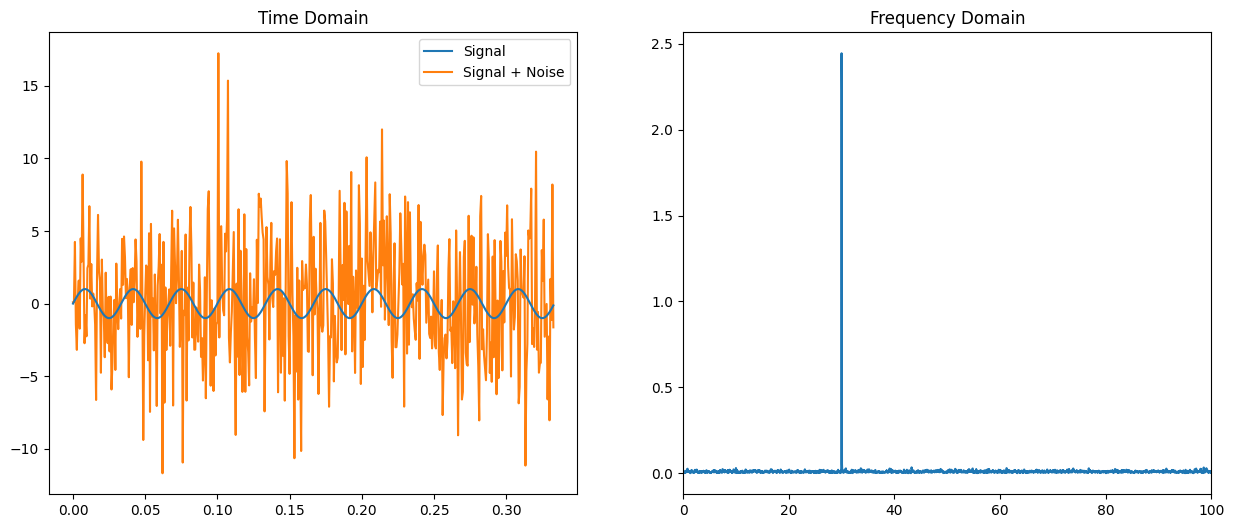

In [3]:
# Simulate signal with noise
frequency_of_interest = 30
sampling_frequency = 1500
time_extent = (0, 50)
n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)
signal = np.sin(2 * np.pi * time * frequency_of_interest)
noise = np.random.normal(0, 4, len(signal))

# Plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(time[:500], signal[:500], label="Signal", zorder=3)
axes[0].plot(time[:500], signal[:500] + noise[:500], label="Signal + Noise")
axes[0].legend()
axes[0].set_title("Time Domain")

multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=3,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)

axes[1].plot(connectivity.frequencies, connectivity.power().squeeze())
axes[1].set_title("Frequency Domain")
axes[1].set_xlim((0, 100))

### Spectrogram

#### No trials, 200 Hz signal with 50 Hz signal starting at 25 seconds

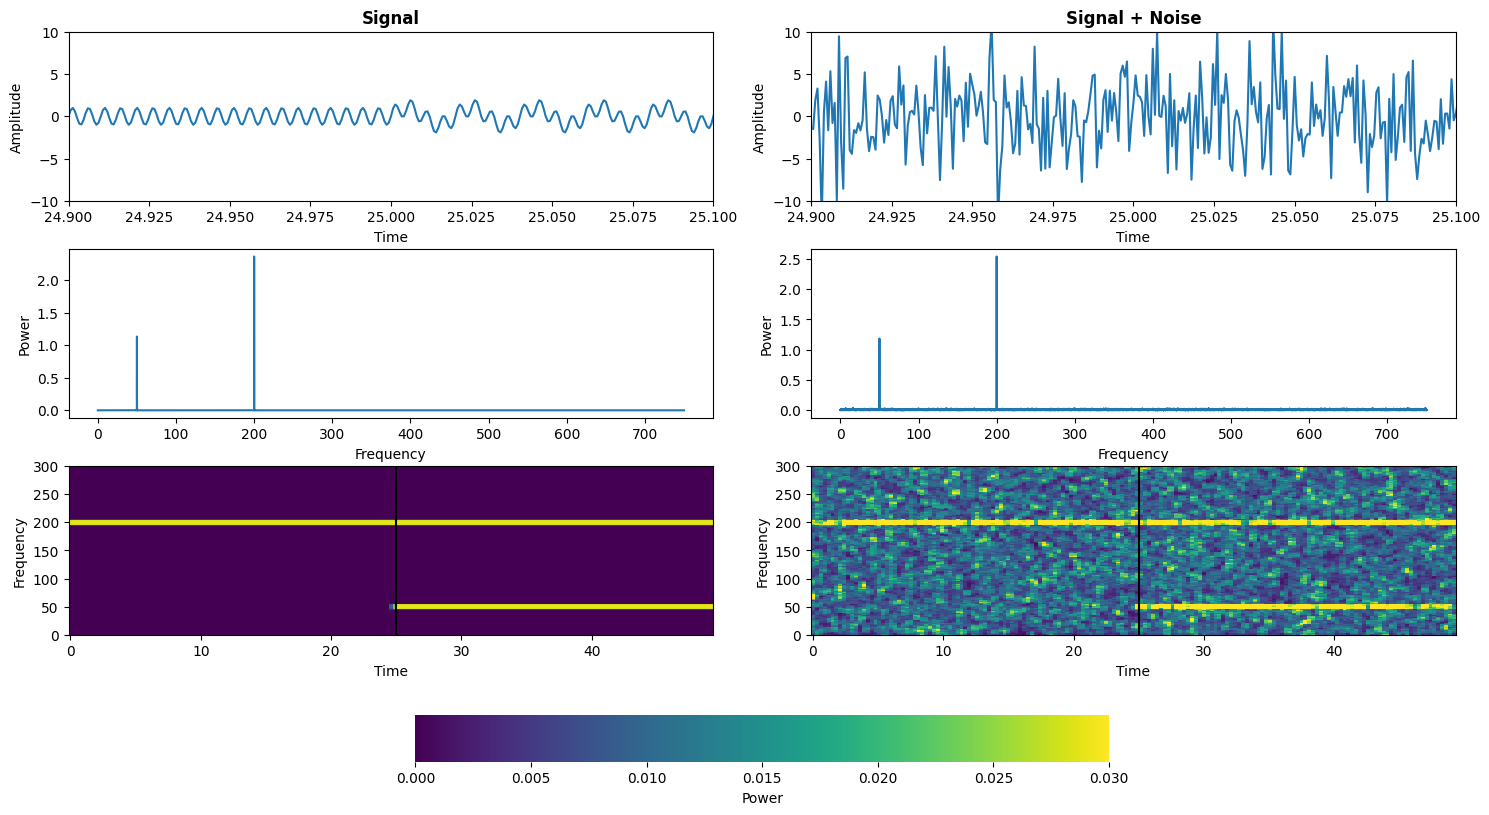

In [4]:
# Simulate signal
frequency_of_interest = [200, 50]
sampling_frequency = 1500
time_extent = (0, 50)
n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)
signal = np.sin(2 * np.pi * time[:, np.newaxis] * frequency_of_interest)
signal[: n_time_samples // 2, 1] = 0
signal = signal.sum(axis=1)
noise = np.random.normal(0, 4, signal.shape)

# Plot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))
axes[0, 0].plot(time, signal)
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")
axes[0, 0].set_title("Signal", fontweight="bold")
axes[0, 0].set_xlim((24.90, 25.10))
axes[0, 0].set_ylim((-10, 10))

axes[0, 1].plot(time, signal + noise)
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Amplitude")
axes[0, 1].set_title("Signal + Noise", fontweight="bold")
axes[0, 1].set_xlim((24.90, 25.10))
axes[0, 1].set_ylim((-10, 10))

multitaper = Multitaper(
    prepare_time_series(signal),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=3,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
axes[1, 0].plot(connectivity.frequencies, connectivity.power().squeeze())
axes[1, 0].set_xlabel("Frequency")
axes[1, 0].set_ylabel("Power")

multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=3,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
axes[1, 1].plot(connectivity.frequencies, connectivity.power().squeeze())
axes[1, 1].set_xlabel("Frequency")
axes[1, 1].set_ylabel("Power")


multitaper = Multitaper(
    prepare_time_series(signal),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=3,
    time_window_duration=0.600,
    time_window_step=0.300,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
mesh = axes[2, 0].pcolormesh(
    connectivity.time,
    connectivity.frequencies,
    connectivity.power().squeeze().T,
    vmin=0.0,
    vmax=0.03,
    cmap="viridis",
    shading="auto",
)
axes[2, 0].set_ylim((0, 300))
axes[2, 0].axvline(time[int(np.fix(n_time_samples / 2))], color="black")
axes[2, 0].set_ylabel("Frequency")
axes[2, 0].set_xlabel("Time")

multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=3,
    time_window_duration=0.600,
    time_window_step=0.300,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
mesh = axes[2, 1].pcolormesh(
    connectivity.time,
    connectivity.frequencies,
    connectivity.power().squeeze().T,
    vmin=0.0,
    vmax=0.03,
    cmap="viridis",
    shading="auto",
)
axes[2, 1].set_ylim((0, 300))
axes[2, 1].axvline(time[int(np.fix(n_time_samples / 2))], color="black")
axes[2, 1].set_ylabel("Frequency")
axes[2, 1].set_xlabel("Time")

plt.tight_layout()
cb = fig.colorbar(
    mesh,
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Power",
)
cb.outline.set_linewidth(0)

#### With trial structure (time x trials)

frequency resolution: 33.333333333333336


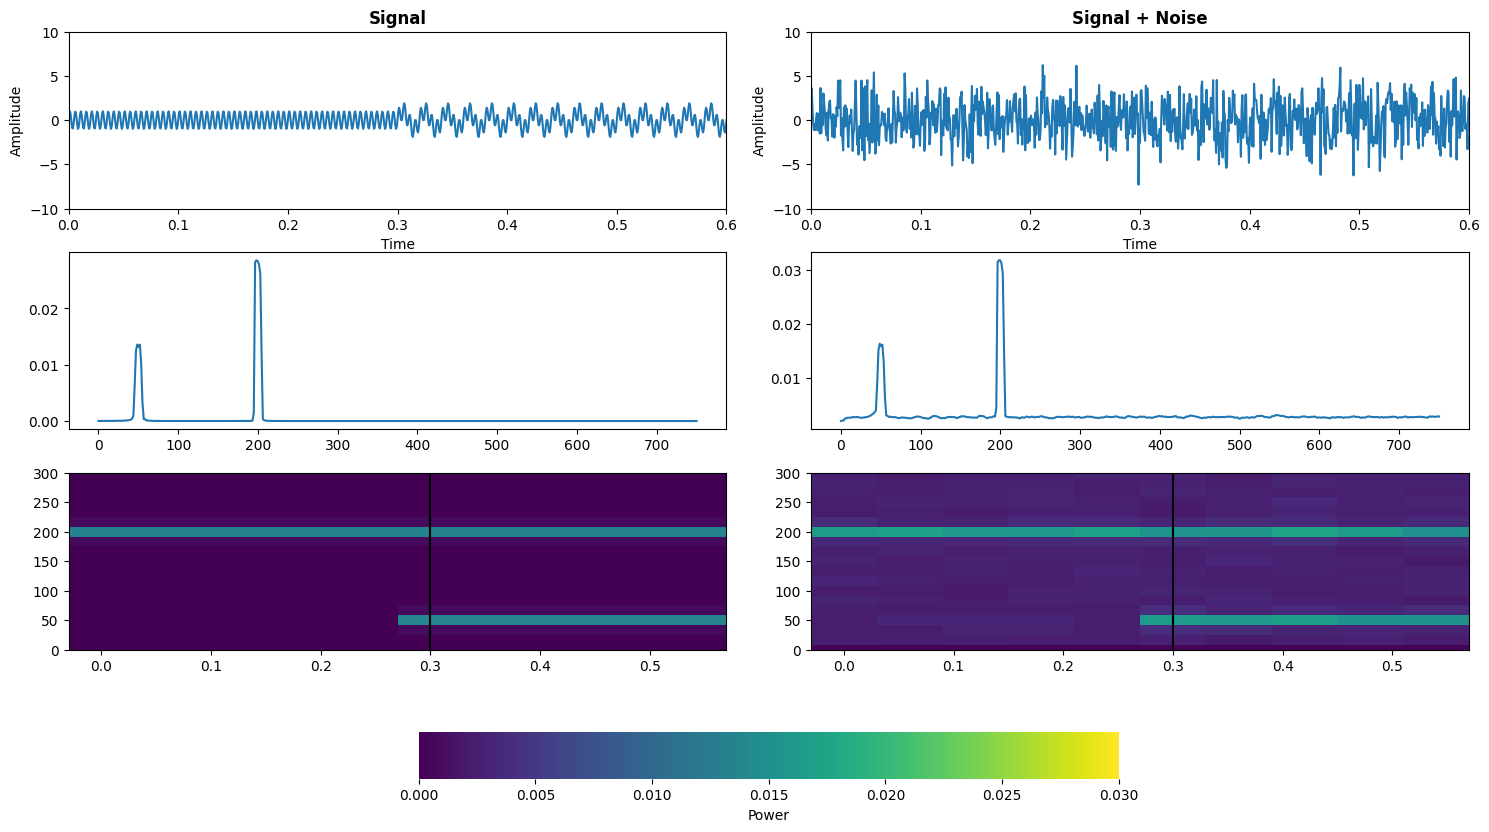

In [5]:
time_halfbandwidth_product = 1

frequency_of_interest = [200, 50]
time_extent = (0, 0.600)
n_trials = 100
sampling_frequency = 1500
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)
signal = np.sin(2 * np.pi * time[:, np.newaxis] * frequency_of_interest)
signal[: n_time_samples // 2, 1] = 0
signal = signal.sum(axis=1)[:, np.newaxis, np.newaxis]
noise = np.random.normal(0, 2, size=(n_time_samples, n_trials, 1))

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))
axes[0, 0].plot(time, signal.squeeze())
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")
axes[0, 0].set_title("Signal", fontweight="bold")
axes[0, 0].set_ylim((-10, 10))

axes[0, 1].plot(time, signal[:, 0, 0] + noise[:, 0, 0])
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Amplitude")
axes[0, 1].set_title("Signal + Noise", fontweight="bold")
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))

multitaper = Multitaper(
    prepare_time_series(signal),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=3,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
axes[1, 0].plot(connectivity.frequencies, connectivity.power().squeeze())

multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=3,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
axes[1, 1].plot(connectivity.frequencies, connectivity.power().squeeze())


multitaper = Multitaper(
    prepare_time_series(signal),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.060,
    time_window_step=0.060,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
mesh = axes[2, 0].pcolormesh(
    connectivity.time,
    connectivity.frequencies,
    connectivity.power().squeeze().T,
    vmin=0.0,
    vmax=0.03,
    cmap="viridis",
    shading="auto",
)
axes[2, 0].set_ylim((0, 300))
axes[2, 0].axvline(time[int(np.fix(n_time_samples / 2))], color="black")

multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.060,
    time_window_step=0.060,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
mesh = axes[2, 1].pcolormesh(
    connectivity.time,
    connectivity.frequencies,
    connectivity.power().squeeze().T,
    vmin=0.0,
    vmax=0.03,
    cmap="viridis",
    shading="auto",
)
axes[2, 1].set_ylim((0, 300))
axes[2, 1].axvline(time[int(np.fix(n_time_samples / 2))], color="black")

plt.tight_layout()
cb = fig.colorbar(
    mesh,
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Power",
)
cb.outline.set_linewidth(0)
print(f"frequency resolution: {multitaper.frequency_resolution}")

#### Decrease frequency resolution by decreasing time_halfbandwidth

frequency resolution: 100.0


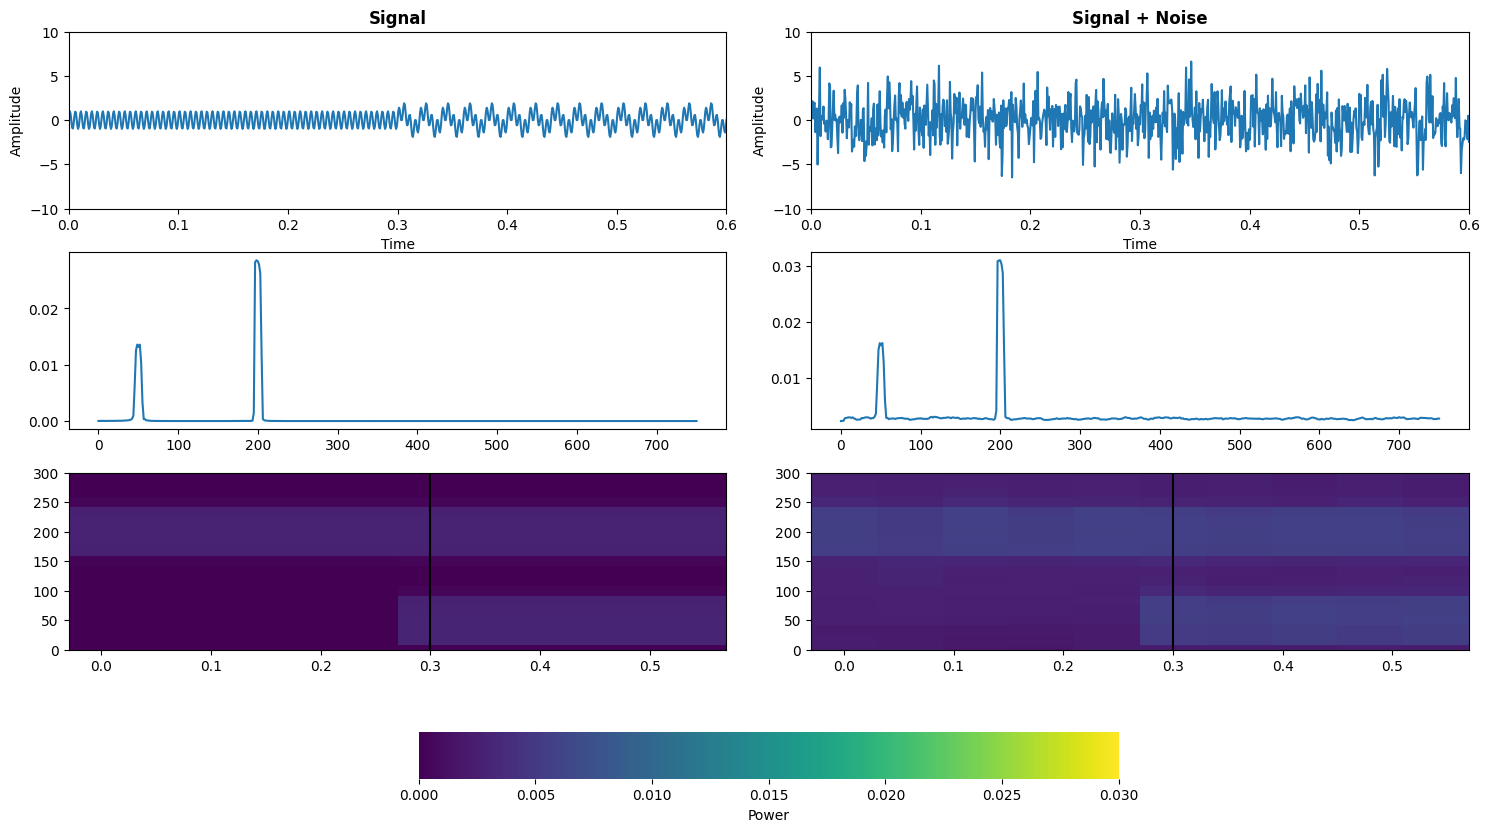

In [6]:
time_halfbandwidth_product = 3

frequency_of_interest = [200, 50]
time_extent = (0, 0.600)
n_trials = 100
sampling_frequency = 1500
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)
signal = np.sin(2 * np.pi * time[:, np.newaxis] * frequency_of_interest)
signal[: n_time_samples // 2, 1] = 0
signal = signal.sum(axis=1)[:, np.newaxis, np.newaxis]
noise = np.random.normal(0, 2, size=(n_time_samples, n_trials, 1))

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))
axes[0, 0].plot(time, signal.squeeze())
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")
axes[0, 0].set_title("Signal", fontweight="bold")
axes[0, 0].set_ylim((-10, 10))

axes[0, 1].plot(time, signal[:, 0, 0] + noise[:, 0, 0])
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Amplitude")
axes[0, 1].set_title("Signal + Noise", fontweight="bold")
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))

multitaper = Multitaper(
    prepare_time_series(signal),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
axes[1, 0].plot(connectivity.frequencies, connectivity.power().squeeze())

multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
axes[1, 1].plot(connectivity.frequencies, connectivity.power().squeeze())


multitaper = Multitaper(
    prepare_time_series(signal),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.060,
    time_window_step=0.060,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
mesh = axes[2, 0].pcolormesh(
    connectivity.time,
    connectivity.frequencies,
    connectivity.power().squeeze().T,
    vmin=0.0,
    vmax=0.03,
    cmap="viridis",
    shading="auto",
)
axes[2, 0].set_ylim((0, 300))
axes[2, 0].axvline(time[int(np.fix(n_time_samples / 2))], color="black")

multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.060,
    time_window_step=0.060,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
mesh = axes[2, 1].pcolormesh(
    connectivity.time,
    connectivity.frequencies,
    connectivity.power().squeeze().T,
    vmin=0.0,
    vmax=0.03,
    cmap="viridis",
    shading="auto",
)
axes[2, 1].set_ylim((0, 300))
axes[2, 1].axvline(time[int(np.fix(n_time_samples / 2))], color="black")

plt.tight_layout()
cb = fig.colorbar(
    mesh,
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Power",
)
cb.outline.set_linewidth(0)
print(f"frequency resolution: {multitaper.frequency_resolution}")

### Coherence

#### No trials, 200 Hz, $\pi / 2$ phase offset

/var/folders/86/m147b4k17lddvs_xsw0mj2zw0000gn/T/ipykernel_53944/1690376022.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


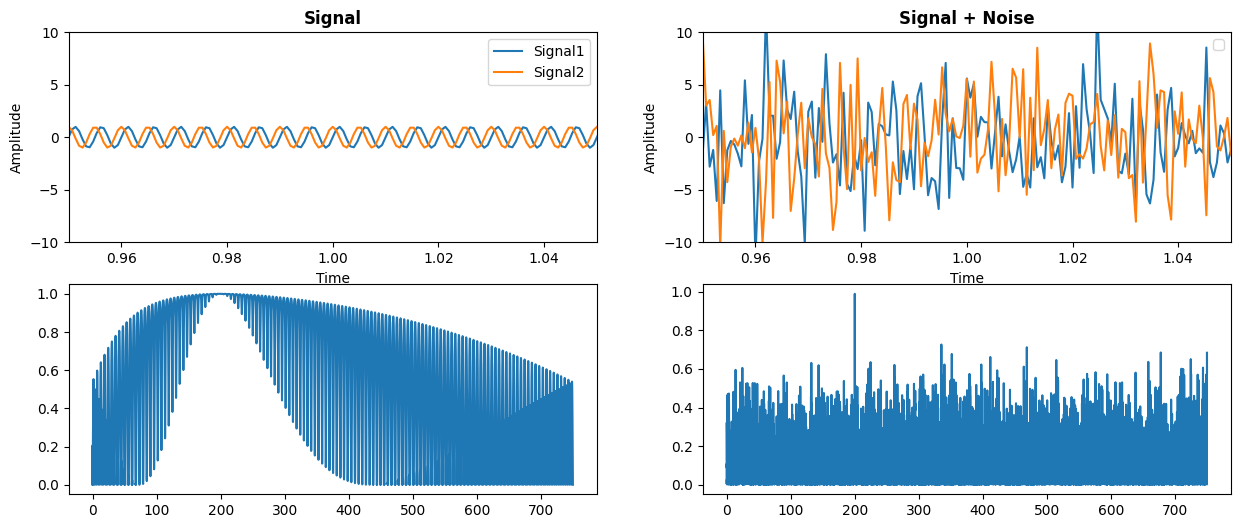

In [7]:
time_halfbandwidth_product = 5
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 50)
n_signals = 2
n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)
signal = np.zeros((n_time_samples, n_signals))
signal[:, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.pi / 2
signal[:, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 4, signal.shape)

plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
plt.title("Signal", fontweight="bold")
plt.plot(time, signal[:, 0], label="Signal1")
plt.plot(time, signal[:, 1], label="Signal2")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xlim((0.95, 1.05))
plt.ylim((-10, 10))
plt.legend()

plt.subplot(2, 2, 2)
plt.title("Signal + Noise", fontweight="bold")
plt.plot(time, signal + noise)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xlim((0.95, 1.05))
plt.ylim((-10, 10))
plt.legend()

multitaper = Multitaper(
    prepare_time_series(signal, axis='signals'),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
plt.subplot(2, 2, 3)
plt.plot(connectivity.frequencies, connectivity.coherence_magnitude()[0, :, 0, 1])


multitaper = Multitaper(
    prepare_time_series(signal + noise, axis='signals'),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
plt.subplot(2, 2, 4)
plt.plot(connectivity.frequencies, connectivity.coherence_magnitude()[0, :, 0, 1])

#### With trial structure (time x trials), 200 Hz, $\pi / 2$ phase offset

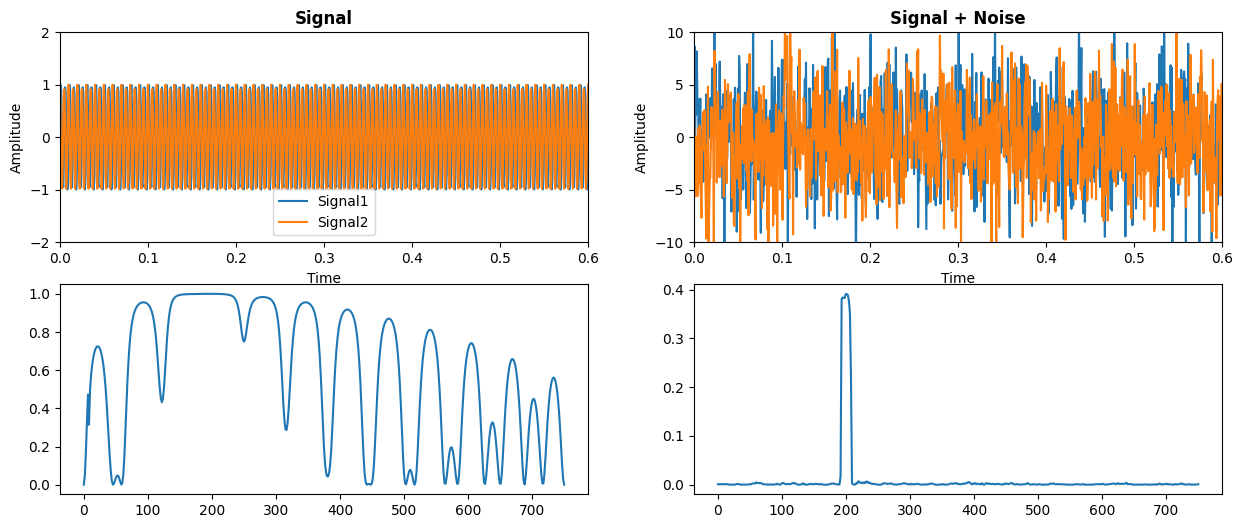

In [8]:
time_halfbandwidth_product = 5
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 0.600)
n_trials = 100
n_signals = 2
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)[
    :, np.newaxis
]
signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.pi / 2
signal[:, :, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 4, signal.shape)

plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
plt.title("Signal", fontweight="bold")
plt.plot(time, signal[:, 0, 0], label="Signal1")
plt.plot(time, signal[:, 0, 1], label="Signal2")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xlim(time_extent)
plt.ylim((-2, 2))
plt.legend()

plt.subplot(2, 2, 2)
plt.title("Signal + Noise", fontweight="bold")
plt.plot(time, signal[:, 0, :] + noise[:, 0, :])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xlim(time_extent)
plt.ylim((-10, 10))

multitaper = Multitaper(
    prepare_time_series(signal),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
plt.subplot(2, 2, 3)
plt.plot(connectivity.frequencies, connectivity.coherence_magnitude()[0, :, 0, 1])


multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
plt.subplot(2, 2, 4)
plt.plot(connectivity.frequencies, connectivity.coherence_magnitude()[0, :, 0, 1])

### Cohereograms

frequency resolution: 50.0


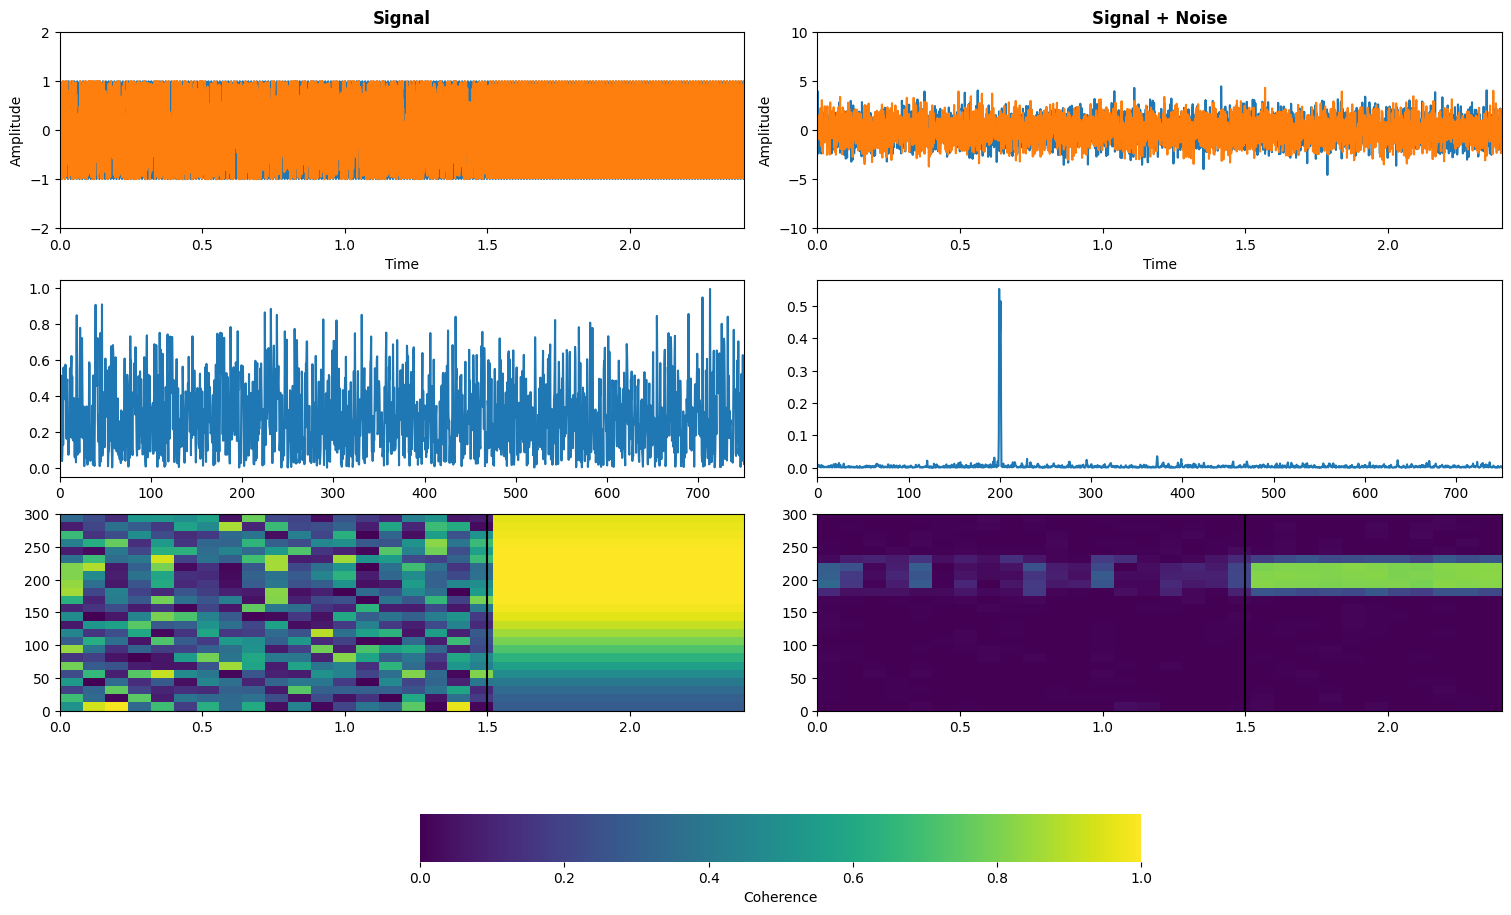

In [9]:
time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 2
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)[
    :, np.newaxis
]
signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.random.uniform(-np.pi, np.pi, size=(n_time_samples, 1))
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 1, signal.shape)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9), constrained_layout=True)
axes[0, 0].set_title("Signal", fontweight="bold")
axes[0, 0].plot(time, signal[:, 0, 0], label="Signal1")
axes[0, 0].plot(time, signal[:, 0, 1], label="Signal2")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_ylim((-2, 2))

axes[0, 1].set_title("Signal + Noise", fontweight="bold")
axes[0, 1].plot(time, signal[:, 0, :] + noise[:, 0, :])
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Amplitude")
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))

multitaper = Multitaper(
    prepare_time_series(signal),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
axes[1, 0].plot(
    connectivity.frequencies, connectivity.coherence_magnitude()[..., 0, 1].squeeze()
)
axes[1, 0].set_xlim((0, multitaper.nyquist_frequency))

multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
axes[1, 1].plot(
    connectivity.frequencies, connectivity.coherence_magnitude()[..., 0, 1].squeeze()
)
axes[1, 1].set_xlim((0, multitaper.nyquist_frequency))


multitaper = Multitaper(
    prepare_time_series(signal),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
time_grid, freq_grid = np.meshgrid(
    np.append(connectivity.time, time_extent[-1]),
    np.append(connectivity.frequencies, multitaper.nyquist_frequency),
)

mesh = axes[2, 0].pcolormesh(
    time_grid,
    freq_grid,
    connectivity.coherence_magnitude()[..., 0, 1].squeeze().T,
    vmin=0.0,
    vmax=1.0,
    cmap="viridis",
)
axes[2, 0].set_ylim((0, 300))
axes[2, 0].set_xlim(time_extent)
axes[2, 0].axvline(1.5, color="black")

multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)

time_grid, freq_grid = np.meshgrid(
    np.append(connectivity.time, time_extent[-1]),
    np.append(connectivity.frequencies, multitaper.nyquist_frequency),
)

mesh = axes[2, 1].pcolormesh(
    time_grid,
    freq_grid,
    connectivity.coherence_magnitude()[..., 0, 1].squeeze().T,
    vmin=0.0,
    vmax=1.0,
    cmap="viridis",
)
axes[2, 1].set_ylim((0, 300))
axes[2, 1].set_xlim(time_extent)
axes[2, 1].axvline(1.5, color="black")

cb = fig.colorbar(
    mesh,
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Coherence",
)
cb.outline.set_linewidth(0)
print(f"frequency resolution: {multitaper.frequency_resolution}")

### Imaginary Coherence

frequency resolution: 50.0


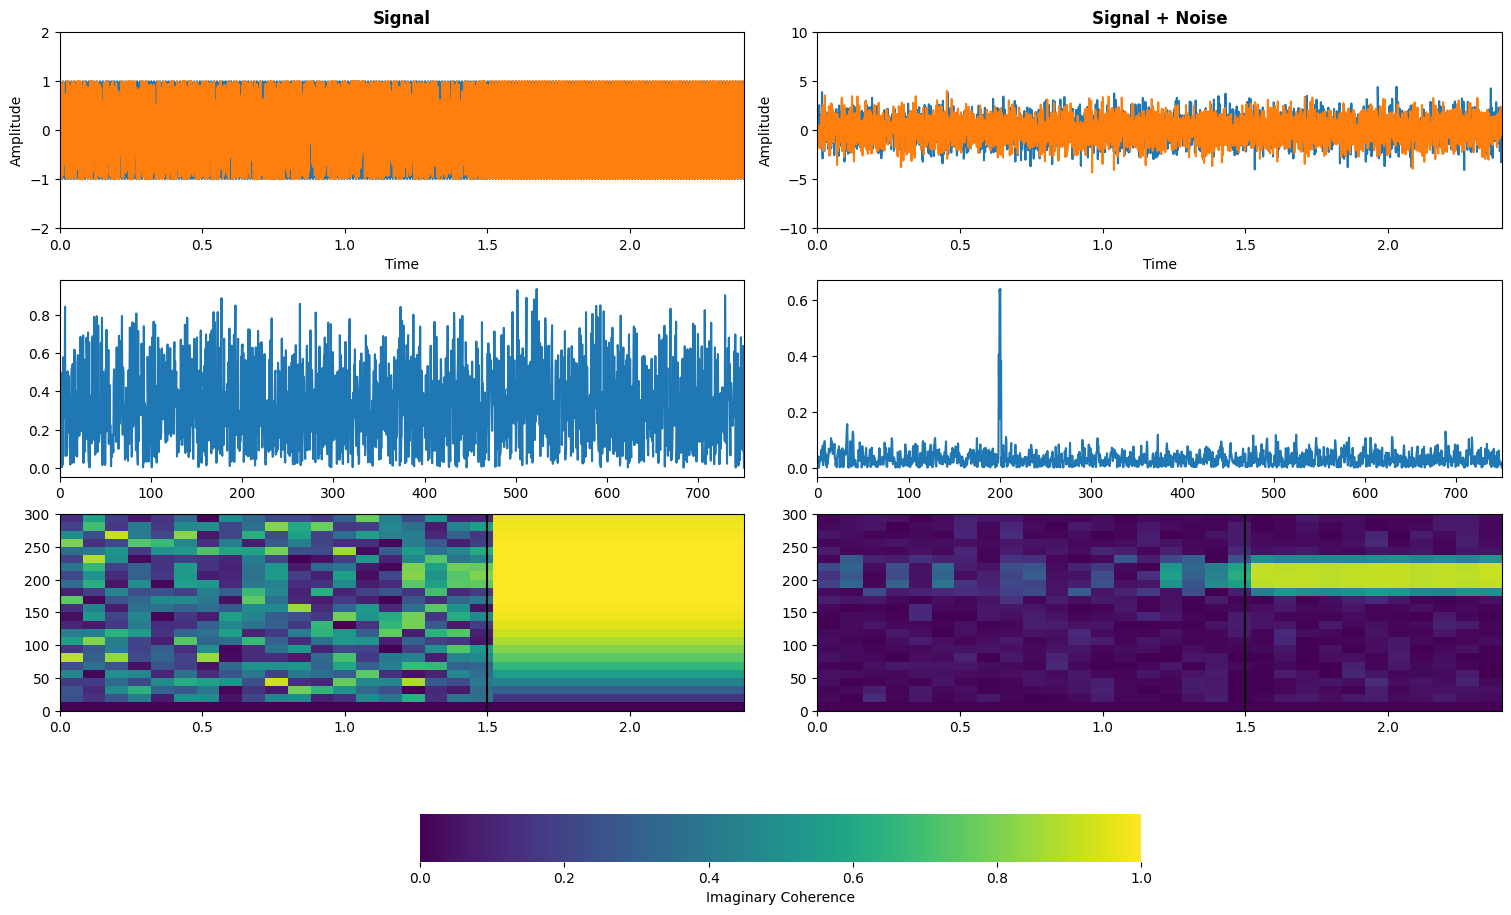

In [10]:
time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 2
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)[
    :, np.newaxis
]
signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.random.uniform(-np.pi, np.pi, size=(n_time_samples, 1))
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 1, signal.shape)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9), constrained_layout=True)
axes[0, 0].set_title("Signal", fontweight="bold")
axes[0, 0].plot(time, signal[:, 0, 0], label="Signal1")
axes[0, 0].plot(time, signal[:, 0, 1], label="Signal2")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_ylim((-2, 2))

axes[0, 1].set_title("Signal + Noise", fontweight="bold")
axes[0, 1].plot(time, signal[:, 0, :] + noise[:, 0, :])
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Amplitude")
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))

multitaper = Multitaper(
    prepare_time_series(signal),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
axes[1, 0].plot(
    connectivity.frequencies, connectivity.imaginary_coherence()[..., 0, 1].squeeze()
)
axes[1, 0].set_xlim((0, multitaper.nyquist_frequency))

multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
axes[1, 1].plot(
    connectivity.frequencies, connectivity.imaginary_coherence()[..., 0, 1].squeeze()
)
axes[1, 1].set_xlim((0, multitaper.nyquist_frequency))


multitaper = Multitaper(
    prepare_time_series(signal),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
time_grid, freq_grid = np.meshgrid(
    np.append(connectivity.time, time_extent[-1]),
    np.append(connectivity.frequencies, multitaper.nyquist_frequency),
)

mesh = axes[2, 0].pcolormesh(
    time_grid,
    freq_grid,
    connectivity.imaginary_coherence()[..., 0, 1].squeeze().T,
    vmin=0.0,
    vmax=1.0,
    cmap="viridis",
)
axes[2, 0].set_ylim((0, 300))
axes[2, 0].set_xlim(time_extent)
axes[2, 0].axvline(1.5, color="black")

multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)

time_grid, freq_grid = np.meshgrid(
    np.append(connectivity.time, time_extent[-1]),
    np.append(connectivity.frequencies, multitaper.nyquist_frequency),
)

mesh = axes[2, 1].pcolormesh(
    time_grid,
    freq_grid,
    connectivity.imaginary_coherence()[..., 0, 1].squeeze().T,
    vmin=0.0,
    vmax=1.0,
    cmap="viridis",
)
axes[2, 1].set_ylim((0, 300))
axes[2, 1].set_xlim(time_extent)
axes[2, 1].axvline(1.5, color="black")

cb = fig.colorbar(
    mesh,
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Imaginary Coherence",
)
cb.outline.set_linewidth(0)
print(f"frequency resolution: {multitaper.frequency_resolution}")

### Phase Locking Value

frequency resolution: 50.0


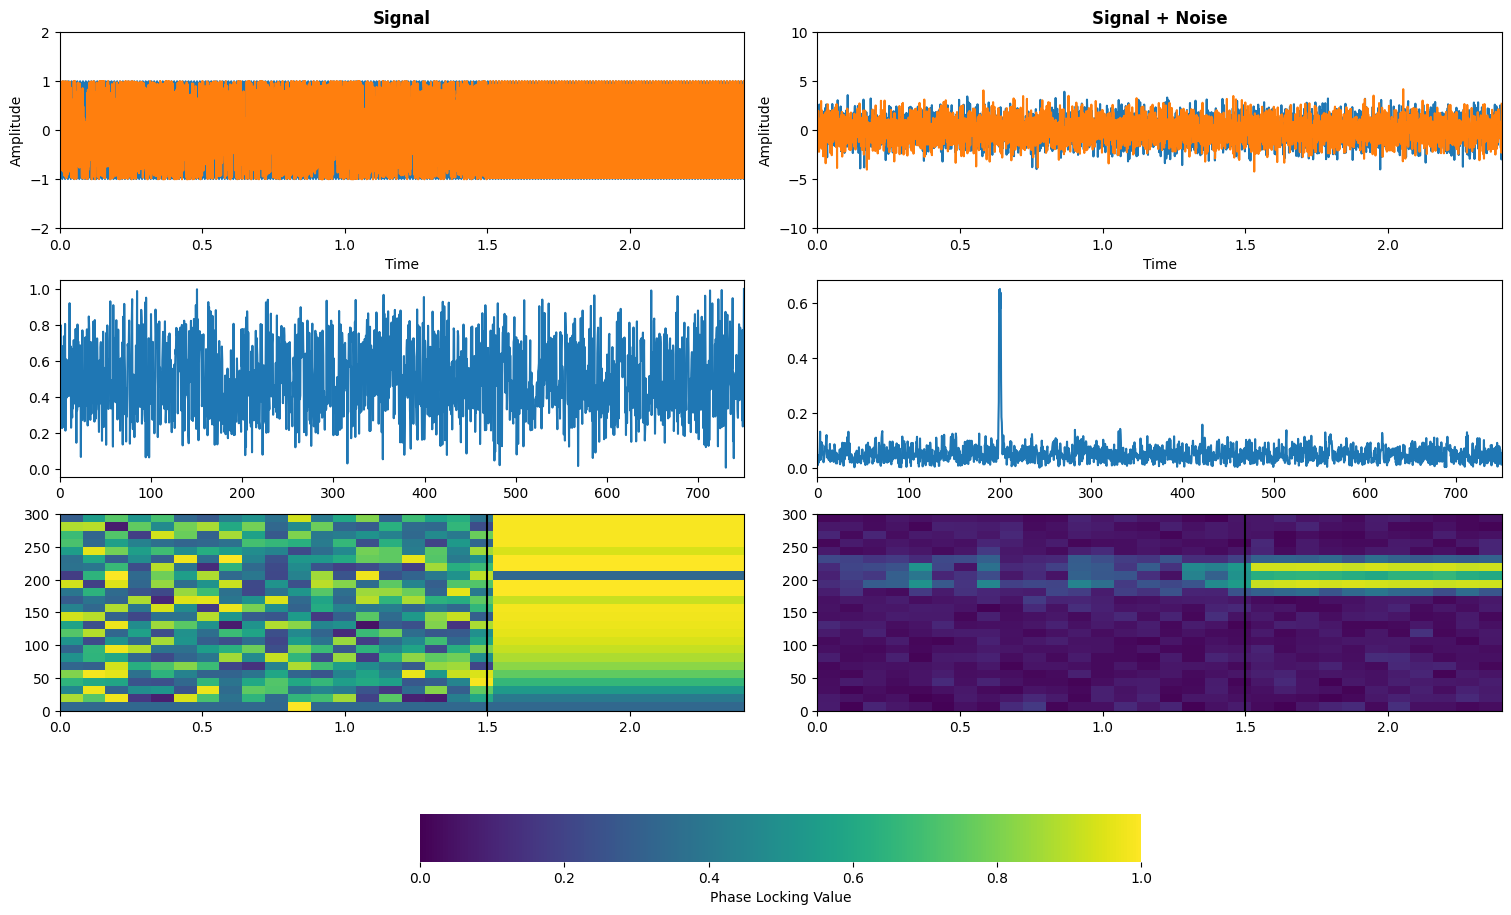

In [11]:
time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 2
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)[
    :, np.newaxis
]
signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.random.uniform(-np.pi, np.pi, size=(n_time_samples, 1))
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 1, signal.shape)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9), constrained_layout=True)
axes[0, 0].set_title("Signal", fontweight="bold")
axes[0, 0].plot(time, signal[:, 0, 0], label="Signal1")
axes[0, 0].plot(time, signal[:, 0, 1], label="Signal2")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_ylim((-2, 2))

axes[0, 1].set_title("Signal + Noise", fontweight="bold")
axes[0, 1].plot(time, signal[:, 0, :] + noise[:, 0, :])
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Amplitude")
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))

multitaper = Multitaper(
    prepare_time_series(signal),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
axes[1, 0].plot(
    connectivity.frequencies, connectivity.phase_locking_value()[..., 0, 1].squeeze()
)
axes[1, 0].set_xlim((0, multitaper.nyquist_frequency))

multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
axes[1, 1].plot(
    connectivity.frequencies, connectivity.phase_locking_value()[..., 0, 1].squeeze()
)
axes[1, 1].set_xlim((0, multitaper.nyquist_frequency))


multitaper = Multitaper(
    prepare_time_series(signal),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
time_grid, freq_grid = np.meshgrid(
    np.append(connectivity.time, time_extent[-1]),
    np.append(connectivity.frequencies, multitaper.nyquist_frequency),
)

mesh = axes[2, 0].pcolormesh(
    time_grid,
    freq_grid,
    connectivity.phase_locking_value()[..., 0, 1].squeeze().T,
    vmin=0.0,
    vmax=1.0,
    cmap="viridis",
)
axes[2, 0].set_ylim((0, 300))
axes[2, 0].set_xlim(time_extent)
axes[2, 0].axvline(1.5, color="black")

multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)

time_grid, freq_grid = np.meshgrid(
    np.append(connectivity.time, time_extent[-1]),
    np.append(connectivity.frequencies, multitaper.nyquist_frequency),
)

mesh = axes[2, 1].pcolormesh(
    time_grid,
    freq_grid,
    connectivity.phase_locking_value()[..., 0, 1].squeeze().T,
    vmin=0.0,
    vmax=1.0,
    cmap="viridis",
)
axes[2, 1].set_ylim((0, 300))
axes[2, 1].set_xlim(time_extent)
axes[2, 1].axvline(1.5, color="black")

cb = fig.colorbar(
    mesh,
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Phase Locking Value",
)
cb.outline.set_linewidth(0)
print(f"frequency resolution: {multitaper.frequency_resolution}")

### Phase Lag Index

frequency resolution: 50.0


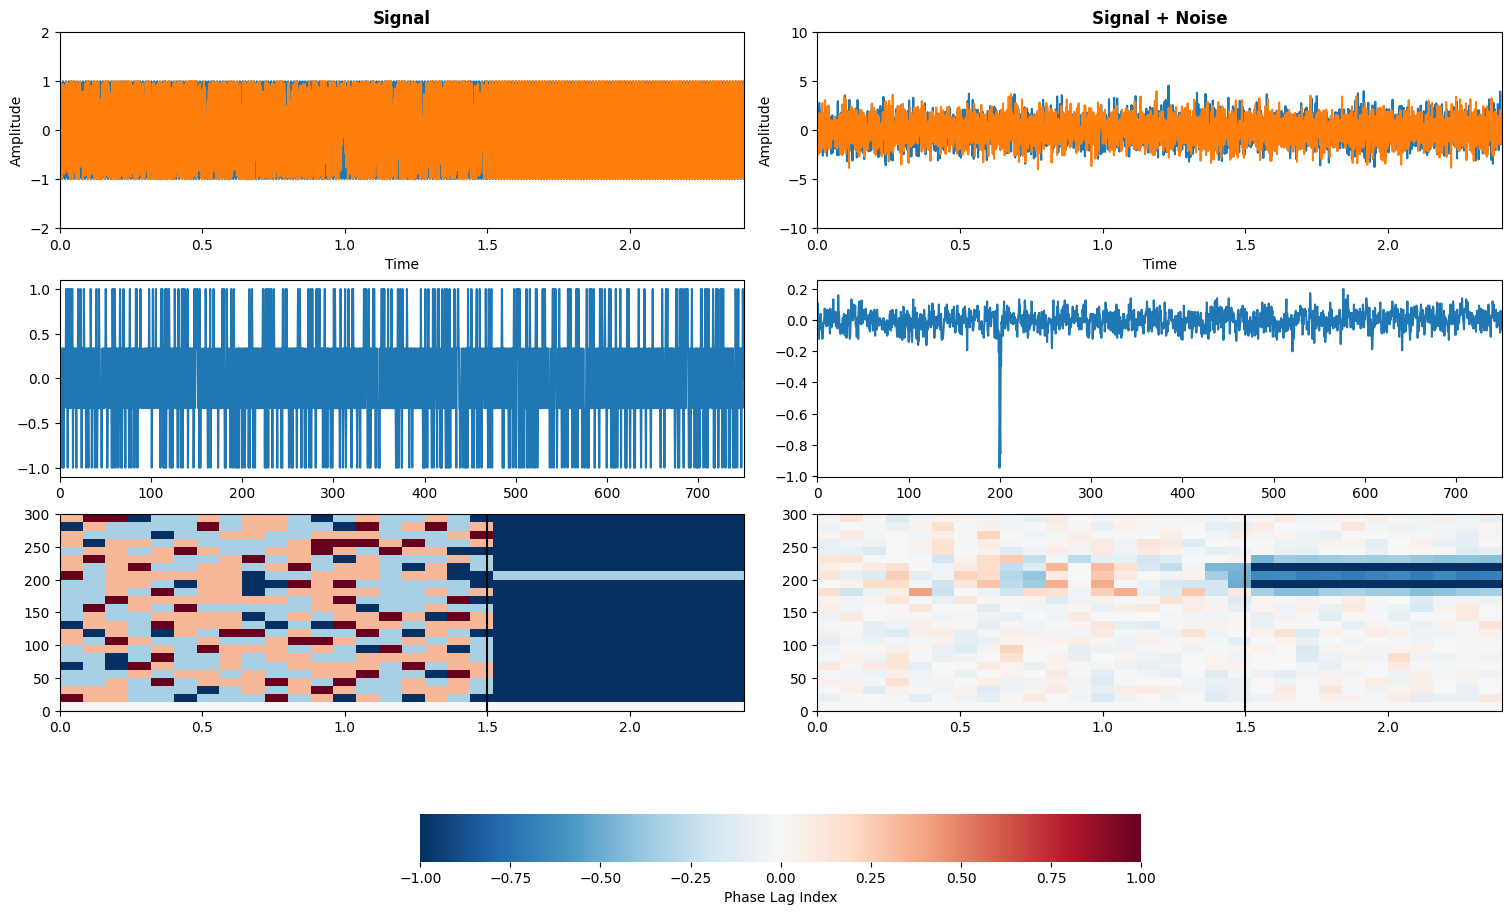

In [12]:
time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 2
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)[
    :, np.newaxis
]
signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.random.uniform(-np.pi, np.pi, size=(n_time_samples, 1))
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 1, signal.shape)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9), constrained_layout=True)
axes[0, 0].set_title("Signal", fontweight="bold")
axes[0, 0].plot(time, signal[:, 0, 0], label="Signal1")
axes[0, 0].plot(time, signal[:, 0, 1], label="Signal2")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_ylim((-2, 2))

axes[0, 1].set_title("Signal + Noise", fontweight="bold")
axes[0, 1].plot(time, signal[:, 0, :] + noise[:, 0, :])
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Amplitude")
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))

multitaper = Multitaper(
    prepare_time_series(signal),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
axes[1, 0].plot(
    connectivity.frequencies, connectivity.phase_lag_index()[..., 0, 1].squeeze()
)
axes[1, 0].set_xlim((0, multitaper.nyquist_frequency))

multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
axes[1, 1].plot(
    connectivity.frequencies, connectivity.phase_lag_index()[..., 0, 1].squeeze()
)
axes[1, 1].set_xlim((0, multitaper.nyquist_frequency))


multitaper = Multitaper(
    prepare_time_series(signal),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
time_grid, freq_grid = np.meshgrid(
    np.append(connectivity.time, time_extent[-1]),
    np.append(connectivity.frequencies, multitaper.nyquist_frequency),
)

mesh = axes[2, 0].pcolormesh(
    time_grid,
    freq_grid,
    connectivity.phase_lag_index()[..., 0, 1].squeeze().T,
    vmin=-1.0,
    vmax=1.0,
    cmap="RdBu_r",
)
axes[2, 0].set_ylim((0, 300))
axes[2, 0].set_xlim(time_extent)
axes[2, 0].axvline(1.5, color="black")

multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)

time_grid, freq_grid = np.meshgrid(
    np.append(connectivity.time, time_extent[-1]),
    np.append(connectivity.frequencies, multitaper.nyquist_frequency),
)

mesh = axes[2, 1].pcolormesh(
    time_grid,
    freq_grid,
    connectivity.phase_lag_index()[..., 0, 1].squeeze().T,
    vmin=-1.0,
    vmax=1.0,
    cmap="RdBu_r",
)
axes[2, 1].set_ylim((0, 300))
axes[2, 1].set_xlim(time_extent)
axes[2, 1].axvline(1.5, color="black")

cb = fig.colorbar(
    mesh,
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Phase Lag Index",
)
cb.outline.set_linewidth(0)
print(f"frequency resolution: {multitaper.frequency_resolution}")

### Weighted Phase Lag Index

frequency resolution: 50.0


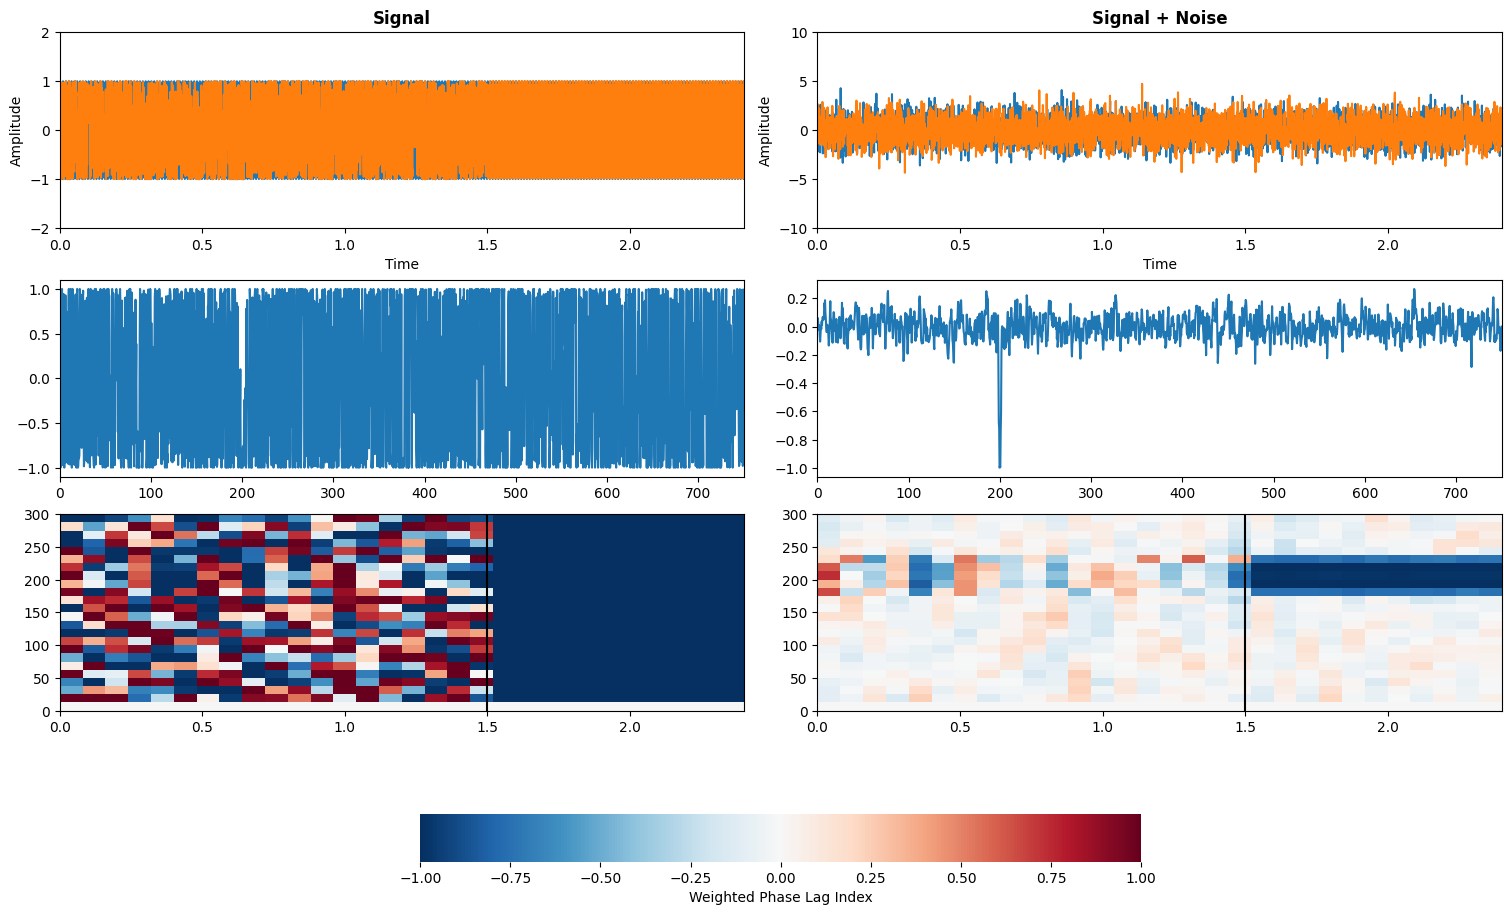

In [13]:
time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 2
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)[
    :, np.newaxis
]
signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.random.uniform(-np.pi, np.pi, size=(n_time_samples, 1))
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 1, signal.shape)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9), constrained_layout=True)
axes[0, 0].set_title("Signal", fontweight="bold")
axes[0, 0].plot(time, signal[:, 0, 0], label="Signal1")
axes[0, 0].plot(time, signal[:, 0, 1], label="Signal2")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_ylim((-2, 2))

axes[0, 1].set_title("Signal + Noise", fontweight="bold")
axes[0, 1].plot(time, signal[:, 0, :] + noise[:, 0, :])
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Amplitude")
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))

multitaper = Multitaper(
    prepare_time_series(signal),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
axes[1, 0].plot(
    connectivity.frequencies,
    connectivity.weighted_phase_lag_index()[..., 0, 1].squeeze(),
)
axes[1, 0].set_xlim((0, multitaper.nyquist_frequency))

multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
axes[1, 1].plot(
    connectivity.frequencies,
    connectivity.weighted_phase_lag_index()[..., 0, 1].squeeze(),
)
axes[1, 1].set_xlim((0, multitaper.nyquist_frequency))


multitaper = Multitaper(
    prepare_time_series(signal),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
time_grid, freq_grid = np.meshgrid(
    np.append(connectivity.time, time_extent[-1]),
    np.append(connectivity.frequencies, multitaper.nyquist_frequency),
)

mesh = axes[2, 0].pcolormesh(
    time_grid,
    freq_grid,
    connectivity.weighted_phase_lag_index()[..., 0, 1].squeeze().T,
    vmin=-1.0,
    vmax=1.0,
    cmap="RdBu_r",
)
axes[2, 0].set_ylim((0, 300))
axes[2, 0].set_xlim(time_extent)
axes[2, 0].axvline(1.5, color="black")

multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)

time_grid, freq_grid = np.meshgrid(
    np.append(connectivity.time, time_extent[-1]),
    np.append(connectivity.frequencies, multitaper.nyquist_frequency),
)

mesh = axes[2, 1].pcolormesh(
    time_grid,
    freq_grid,
    connectivity.weighted_phase_lag_index()[..., 0, 1].squeeze().T,
    vmin=-1.0,
    vmax=1.0,
    cmap="RdBu_r",
)
axes[2, 1].set_ylim((0, 300))
axes[2, 1].set_xlim(time_extent)
axes[2, 1].axvline(1.5, color="black")

cb = fig.colorbar(
    mesh,
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Weighted Phase Lag Index",
)
cb.outline.set_linewidth(0)
print(f"frequency resolution: {multitaper.frequency_resolution}")

frequency resolution: 50.0


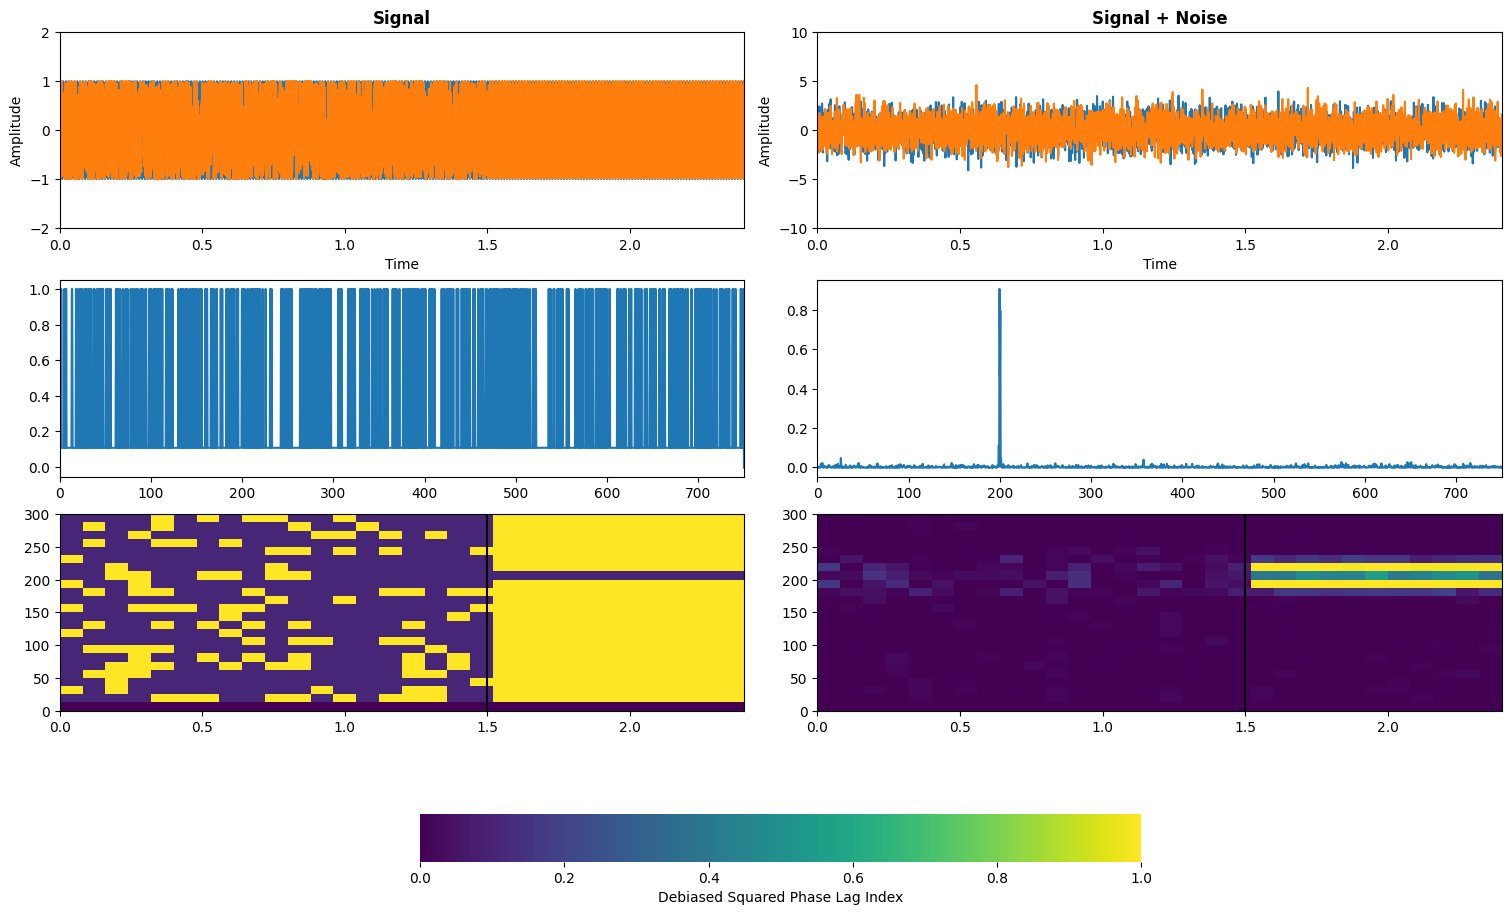

In [14]:
time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 2
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)[
    :, np.newaxis
]
signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.random.uniform(-np.pi, np.pi, size=(n_time_samples, 1))
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 1, signal.shape)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9), constrained_layout=True)
axes[0, 0].set_title("Signal", fontweight="bold")
axes[0, 0].plot(time, signal[:, 0, 0], label="Signal1")
axes[0, 0].plot(time, signal[:, 0, 1], label="Signal2")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_ylim((-2, 2))

axes[0, 1].set_title("Signal + Noise", fontweight="bold")
axes[0, 1].plot(time, signal[:, 0, :] + noise[:, 0, :])
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Amplitude")
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))

multitaper = Multitaper(
    prepare_time_series(signal),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
axes[1, 0].plot(
    connectivity.frequencies,
    connectivity.debiased_squared_phase_lag_index()[..., 0, 1].squeeze(),
)
axes[1, 0].set_xlim((0, multitaper.nyquist_frequency))

multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
axes[1, 1].plot(
    connectivity.frequencies,
    connectivity.debiased_squared_phase_lag_index()[..., 0, 1].squeeze(),
)
axes[1, 1].set_xlim((0, multitaper.nyquist_frequency))


multitaper = Multitaper(
    prepare_time_series(signal),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
time_grid, freq_grid = np.meshgrid(
    np.append(connectivity.time, time_extent[-1]),
    np.append(connectivity.frequencies, multitaper.nyquist_frequency),
)

mesh = axes[2, 0].pcolormesh(
    time_grid,
    freq_grid,
    connectivity.debiased_squared_phase_lag_index()[..., 0, 1].squeeze().T,
    vmin=0.0,
    vmax=1.0,
    cmap="viridis",
)
axes[2, 0].set_ylim((0, 300))
axes[2, 0].set_xlim(time_extent)
axes[2, 0].axvline(1.5, color="black")

multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)

time_grid, freq_grid = np.meshgrid(
    np.append(connectivity.time, time_extent[-1]),
    np.append(connectivity.frequencies, multitaper.nyquist_frequency),
)

mesh = axes[2, 1].pcolormesh(
    time_grid,
    freq_grid,
    connectivity.debiased_squared_phase_lag_index()[..., 0, 1].squeeze().T,
    vmin=0.0,
    vmax=1.0,
    cmap="viridis",
)
axes[2, 1].set_ylim((0, 300))
axes[2, 1].set_xlim(time_extent)
axes[2, 1].axvline(1.5, color="black")

cb = fig.colorbar(
    mesh,
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Debiased Squared Phase Lag Index",
)
cb.outline.set_linewidth(0)
print(f"frequency resolution: {multitaper.frequency_resolution}")

### Debiased Squared Weighted Phase Lag Index

frequency resolution: 50.0


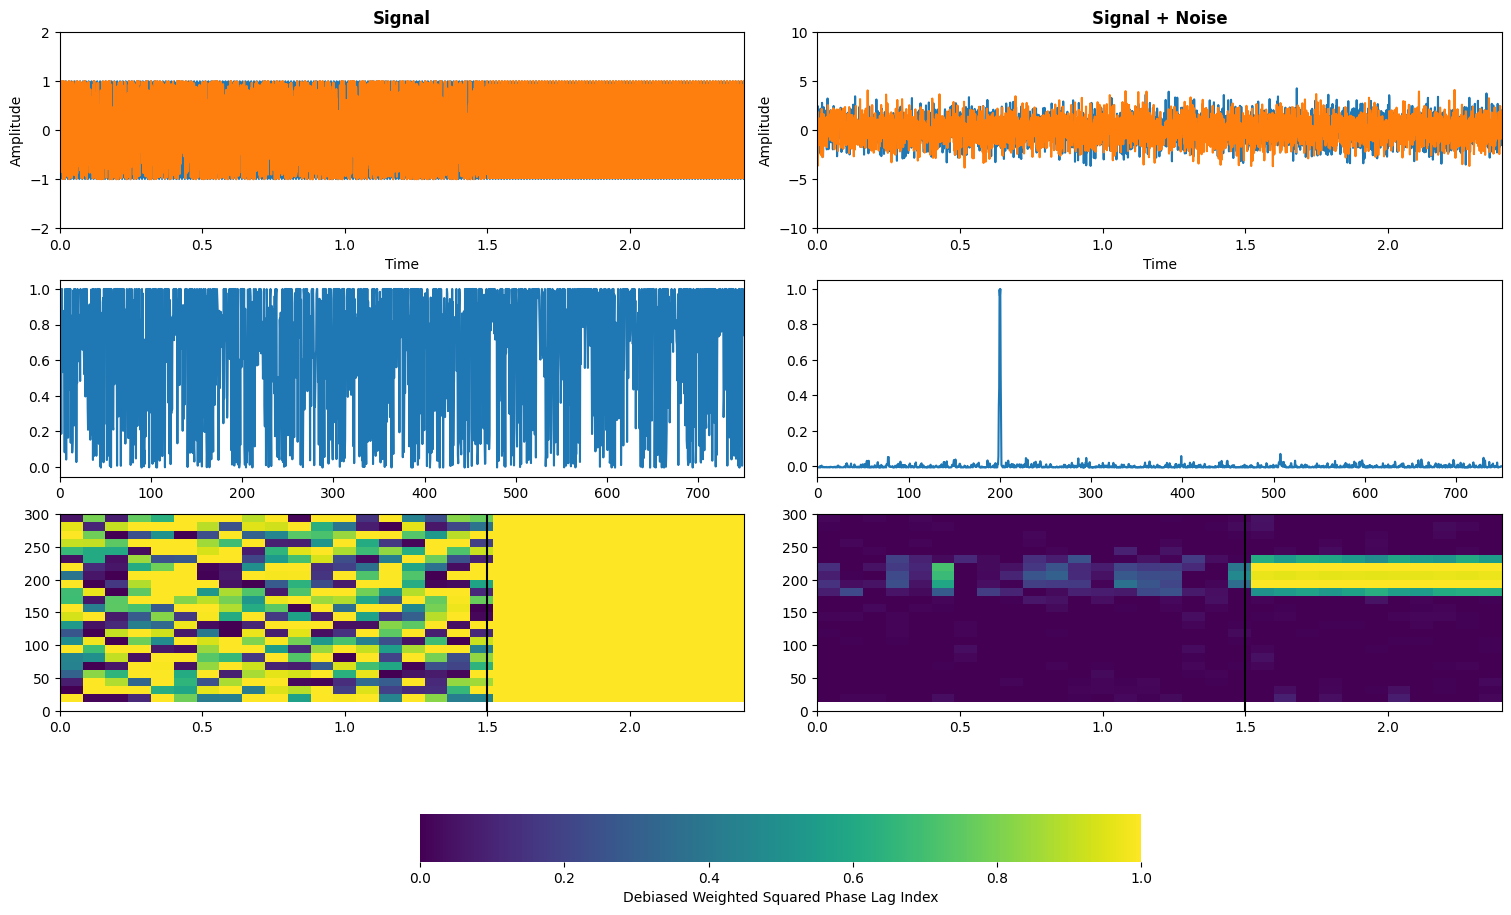

In [15]:
time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 2
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)[
    :, np.newaxis
]
signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.random.uniform(-np.pi, np.pi, size=(n_time_samples, 1))
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 1, signal.shape)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9), constrained_layout=True)
axes[0, 0].set_title("Signal", fontweight="bold")
axes[0, 0].plot(time, signal[:, 0, 0], label="Signal1")
axes[0, 0].plot(time, signal[:, 0, 1], label="Signal2")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_ylim((-2, 2))

axes[0, 1].set_title("Signal + Noise", fontweight="bold")
axes[0, 1].plot(time, signal[:, 0, :] + noise[:, 0, :])
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Amplitude")
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))

multitaper = Multitaper(
    prepare_time_series(signal),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
axes[1, 0].plot(
    connectivity.frequencies,
    connectivity.debiased_squared_weighted_phase_lag_index()[..., 0, 1].squeeze(),
)
axes[1, 0].set_xlim((0, multitaper.nyquist_frequency))

multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
axes[1, 1].plot(
    connectivity.frequencies,
    connectivity.debiased_squared_weighted_phase_lag_index()[..., 0, 1].squeeze(),
)
axes[1, 1].set_xlim((0, multitaper.nyquist_frequency))


multitaper = Multitaper(
    prepare_time_series(signal),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
time_grid, freq_grid = np.meshgrid(
    np.append(connectivity.time, time_extent[-1]),
    np.append(connectivity.frequencies, multitaper.nyquist_frequency),
)

mesh = axes[2, 0].pcolormesh(
    time_grid,
    freq_grid,
    connectivity.debiased_squared_weighted_phase_lag_index()[..., 0, 1].squeeze().T,
    vmin=0.0,
    vmax=1.0,
    cmap="viridis",
)
axes[2, 0].set_ylim((0, 300))
axes[2, 0].set_xlim(time_extent)
axes[2, 0].axvline(1.5, color="black")

multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)

time_grid, freq_grid = np.meshgrid(
    np.append(connectivity.time, time_extent[-1]),
    np.append(connectivity.frequencies, multitaper.nyquist_frequency),
)

mesh = axes[2, 1].pcolormesh(
    time_grid,
    freq_grid,
    connectivity.debiased_squared_weighted_phase_lag_index()[..., 0, 1].squeeze().T,
    vmin=0.0,
    vmax=1.0,
    cmap="viridis",
)
axes[2, 1].set_ylim((0, 300))
axes[2, 1].set_xlim(time_extent)
axes[2, 1].axvline(1.5, color="black")

cb = fig.colorbar(
    mesh,
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Debiased Weighted Squared Phase Lag Index",
)
cb.outline.set_linewidth(0)
print(f"frequency resolution: {multitaper.frequency_resolution}")

### Pairwise Phase Consistency

frequency resolution: 50.0


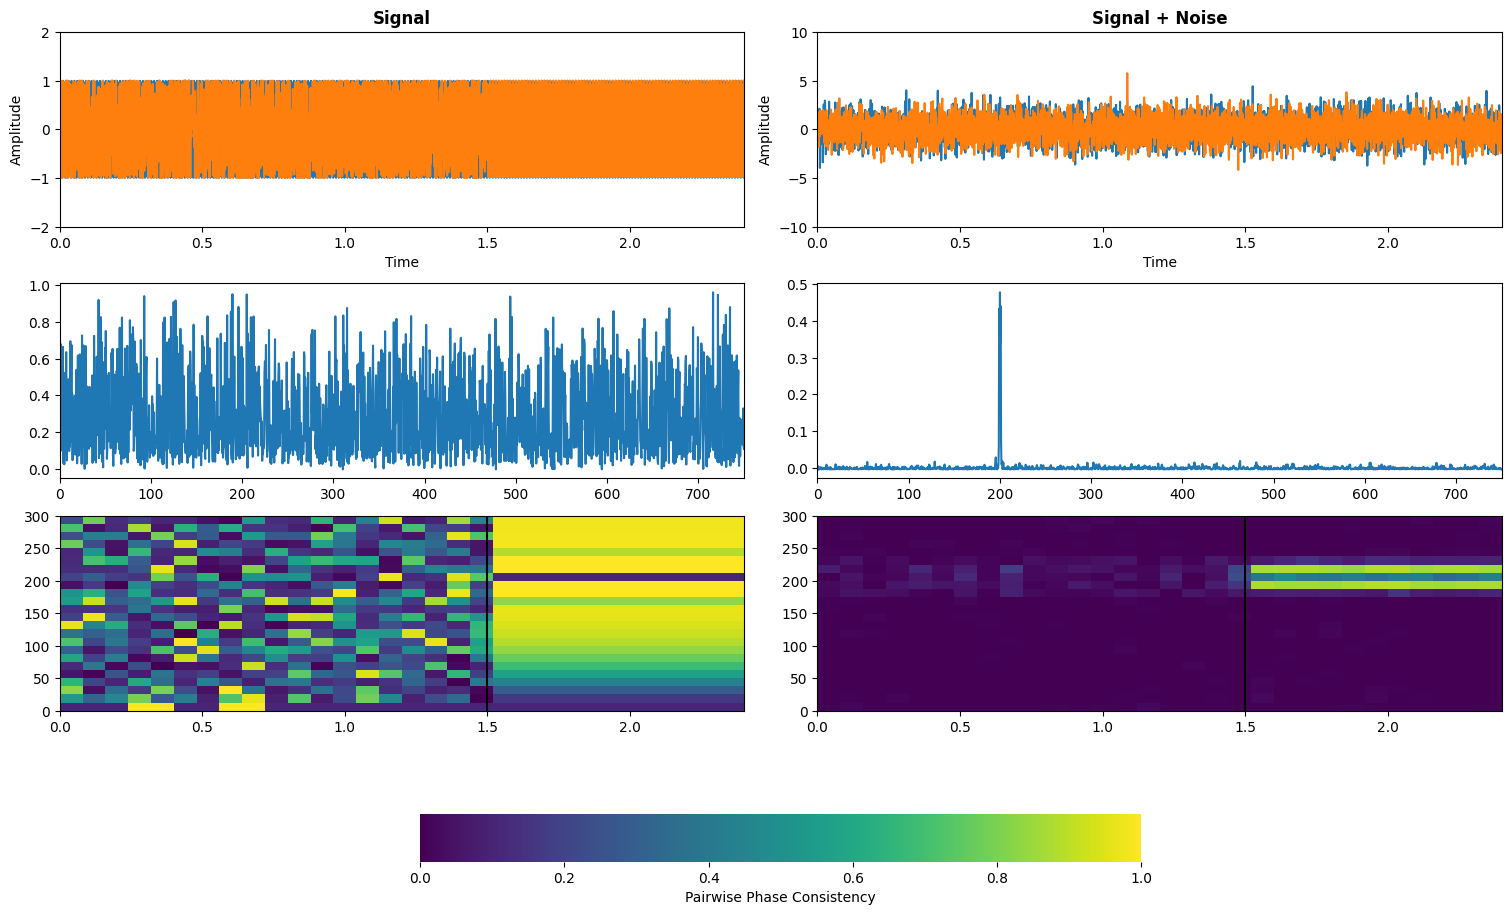

In [16]:
time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 2
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)[
    :, np.newaxis
]
signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.random.uniform(-np.pi, np.pi, size=(n_time_samples, 1))
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 1, signal.shape)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9), constrained_layout=True)
axes[0, 0].set_title("Signal", fontweight="bold")
axes[0, 0].plot(time, signal[:, 0, 0], label="Signal1")
axes[0, 0].plot(time, signal[:, 0, 1], label="Signal2")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_ylim((-2, 2))

axes[0, 1].set_title("Signal + Noise", fontweight="bold")
axes[0, 1].plot(time, signal[:, 0, :] + noise[:, 0, :])
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Amplitude")
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))

multitaper = Multitaper(
    prepare_time_series(signal),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
axes[1, 0].plot(
    connectivity.frequencies,
    connectivity.pairwise_phase_consistency()[..., 0, 1].squeeze(),
)
axes[1, 0].set_xlim((0, multitaper.nyquist_frequency))

multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
axes[1, 1].plot(
    connectivity.frequencies,
    connectivity.pairwise_phase_consistency()[..., 0, 1].squeeze(),
)
axes[1, 1].set_xlim((0, multitaper.nyquist_frequency))


multitaper = Multitaper(
    prepare_time_series(signal),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
time_grid, freq_grid = np.meshgrid(
    np.append(connectivity.time, time_extent[-1]),
    np.append(connectivity.frequencies, multitaper.nyquist_frequency),
)

mesh = axes[2, 0].pcolormesh(
    time_grid,
    freq_grid,
    connectivity.pairwise_phase_consistency()[..., 0, 1].squeeze().T,
    vmin=0.0,
    vmax=1.0,
    cmap="viridis",
)
axes[2, 0].set_ylim((0, 300))
axes[2, 0].set_xlim(time_extent)
axes[2, 0].axvline(1.5, color="black")

multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)

time_grid, freq_grid = np.meshgrid(
    np.append(connectivity.time, time_extent[-1]),
    np.append(connectivity.frequencies, multitaper.nyquist_frequency),
)

mesh = axes[2, 1].pcolormesh(
    time_grid,
    freq_grid,
    connectivity.pairwise_phase_consistency()[..., 0, 1].squeeze().T,
    vmin=0.0,
    vmax=1.0,
    cmap="viridis",
)
axes[2, 1].set_ylim((0, 300))
axes[2, 1].set_xlim(time_extent)
axes[2, 1].axvline(1.5, color="black")

cb = fig.colorbar(
    mesh,
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Pairwise Phase Consistency",
)
cb.outline.set_linewidth(0)
print(f"frequency resolution: {multitaper.frequency_resolution}")

### Group Delay


#### Signal \#1 leads Signal \#2

[Text(1, 0, 'x1 → x2')]

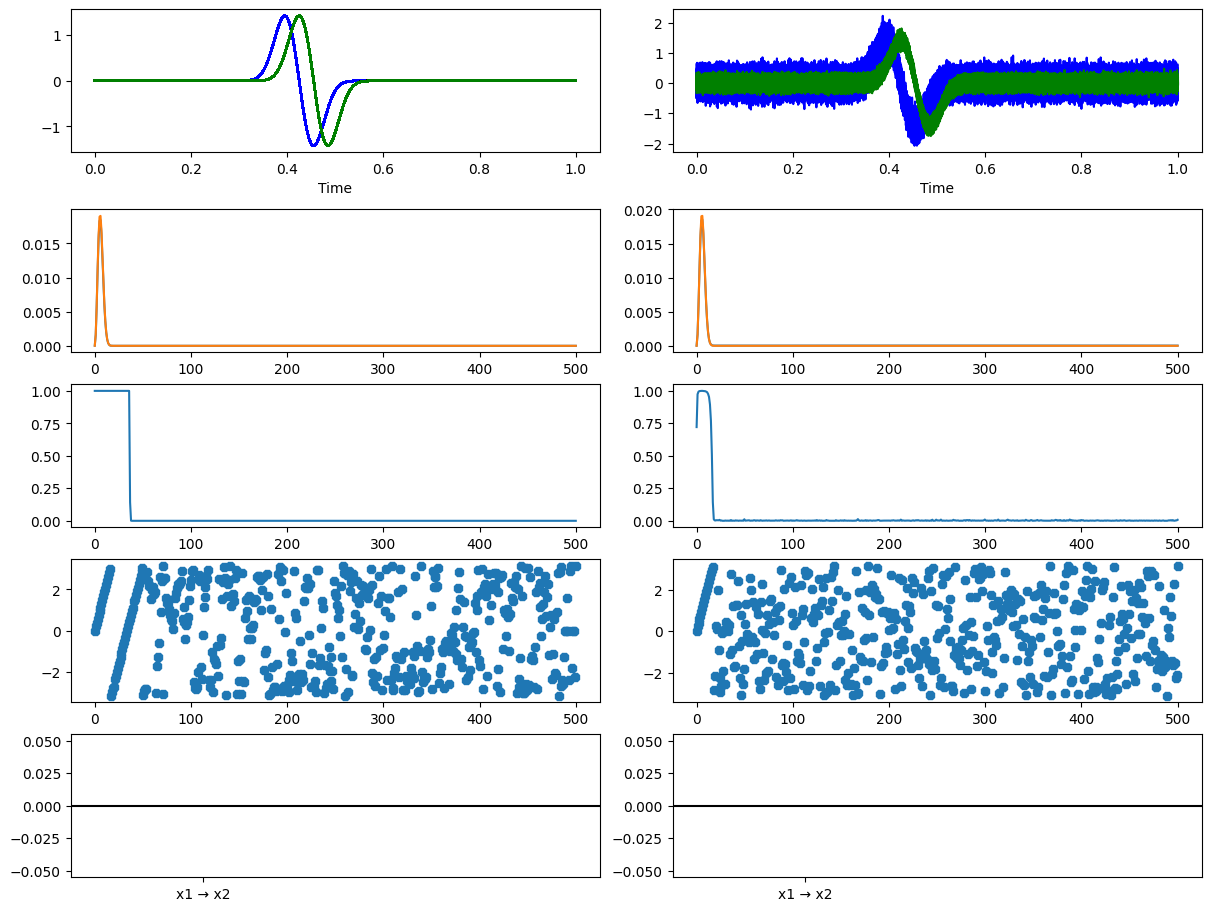

In [17]:
import scipy

sampling_frequency = 1000
time_extent = (0, 1)
n_trials = 500
time_halfbandwidth_product = 1

n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples)

signal1 = (
    scipy.stats.norm.pdf(time, 0.40, 0.025) - scipy.stats.norm.pdf(time, 0.45, 0.025)
) / 10
signal1 = signal1[:, np.newaxis] * np.ones((len(time), n_trials))
signal2 = (
    scipy.stats.norm.pdf(time, 0.43, 0.025) - scipy.stats.norm.pdf(time, 0.48, 0.025)
) / 10
signal2 = signal2[:, np.newaxis] * np.ones((len(time), n_trials))

noise1 = np.random.normal(0, 0.2, size=(len(time), n_trials))
noise2 = np.random.normal(0, 0.1, size=(len(time), n_trials))
data1 = signal1 + noise1
data2 = signal2 + noise2

signals = np.stack((signal1, signal2), axis=-1)
data = np.stack((data1, data2), axis=-1)

fig, axis_handles = plt.subplots(5, 2, figsize=(12, 9), constrained_layout=True)
axis_handles[0, 0].plot(time, signal1, color="blue")
axis_handles[0, 0].plot(time, signal2, color="green")
axis_handles[0, 0].set_xlabel("Time")

axis_handles[0, 1].plot(time, data1, color="blue")
axis_handles[0, 1].plot(time, data2, color="green")
axis_handles[0, 1].set_xlabel("Time")

multitaper = Multitaper(
    signals,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)

axis_handles[1, 0].plot(
    connectivity.frequencies, connectivity.power()[..., 0].squeeze()
)
axis_handles[1, 0].plot(
    connectivity.frequencies, connectivity.power()[..., 1].squeeze()
)
axis_handles[2, 0].plot(
    connectivity.frequencies, connectivity.coherence_magnitude()[..., 0, 1].squeeze()
)
axis_handles[3, 0].plot(
    connectivity.frequencies,
    connectivity.coherence_phase()[..., 0, 1].squeeze(),
    linestyle="None",
    marker="8",
)

delay, slope, r_value = connectivity.group_delay(
    frequencies_of_interest=[2, 10],
    frequency_resolution=multitaper.frequency_resolution,
)
axis_handles[4, 0].bar(
    [1, 2], [delay[..., 0, 1].squeeze(), delay[..., 1, 0].squeeze()], color=["b", "g"]
)
axis_handles[4, 0].set_xlim((0.5, 2.5))
axis_handles[4, 0].axhline(0, color="black")
axis_handles[4, 0].set_xticks([1])
axis_handles[4, 0].set_xticklabels(["x1 → x2"])


multitaper = Multitaper(
    data,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)

axis_handles[1, 1].plot(
    connectivity.frequencies, connectivity.power()[..., 0].squeeze()
)
axis_handles[1, 1].plot(
    connectivity.frequencies, connectivity.power()[..., 1].squeeze()
)
axis_handles[2, 1].plot(
    connectivity.frequencies, connectivity.coherence_magnitude()[..., 0, 1].squeeze()
)
axis_handles[3, 1].plot(
    connectivity.frequencies,
    connectivity.coherence_phase()[..., 0, 1].squeeze(),
    linestyle="None",
    marker="8",
)

delay, slope, r_value = connectivity.group_delay(
    frequencies_of_interest=[2, 10],
    frequency_resolution=multitaper.frequency_resolution,
)
axis_handles[4, 1].bar(
    [1, 2], [delay[..., 0, 1].squeeze(), delay[..., 1, 0].squeeze()], color=["b", "g"]
)
axis_handles[4, 1].set_xlim((0.5, 2.5))
axis_handles[4, 1].axhline(0, color="black")
axis_handles[4, 1].set_xticks([1])
axis_handles[4, 1].set_xticklabels(["x1 → x2"])

#### Signal \#2 leads Signal \#1

[Text(1, 0, 'x1 → x2')]

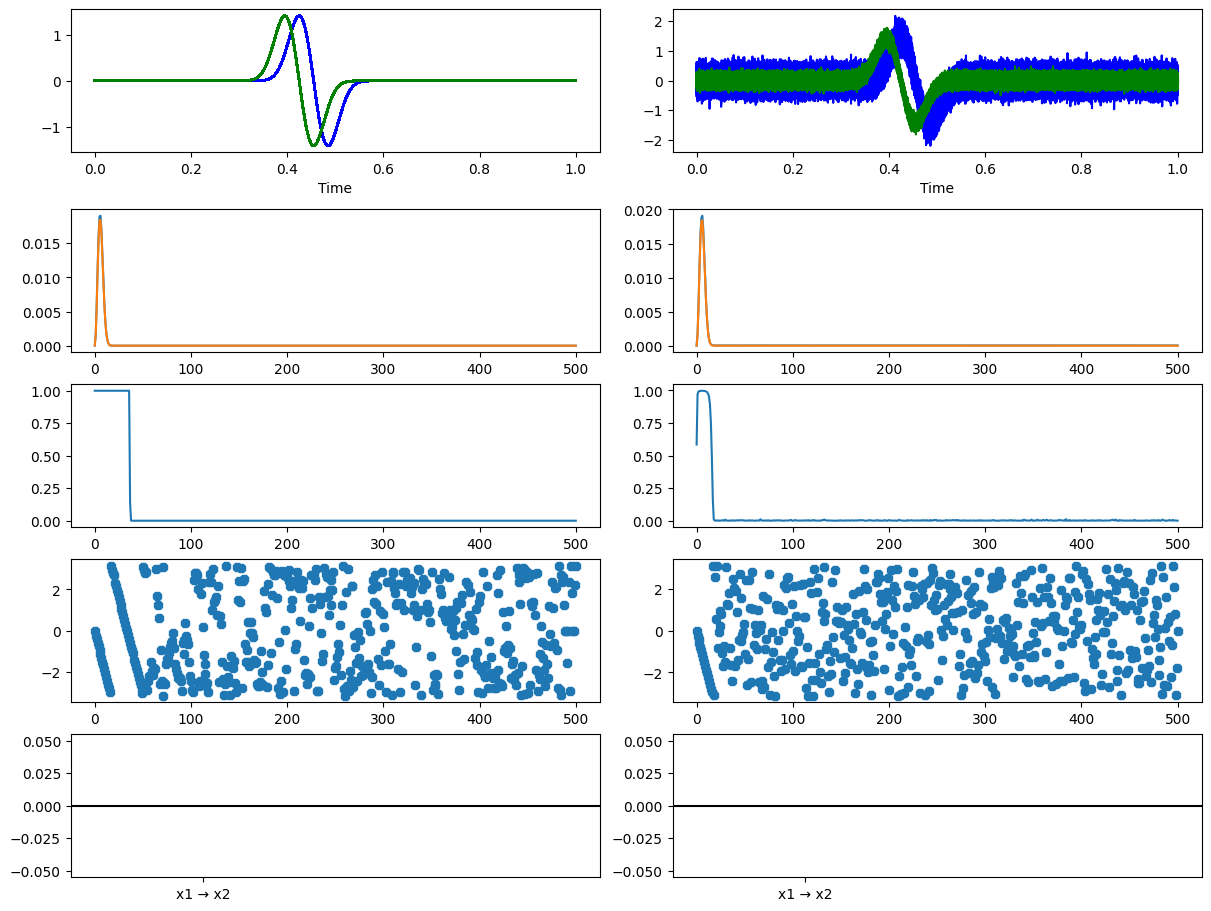

In [18]:
sampling_frequency = 1000
time_extent = (0, 1)
n_trials = 500
time_halfbandwidth_product = 1

n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples)

signal1 = (
    scipy.stats.norm.pdf(time, 0.43, 0.025) - scipy.stats.norm.pdf(time, 0.48, 0.025)
) / 10
signal1 = signal1[:, np.newaxis] * np.ones((len(time), n_trials))
signal2 = (
    scipy.stats.norm.pdf(time, 0.40, 0.025) - scipy.stats.norm.pdf(time, 0.45, 0.025)
) / 10
signal2 = signal2[:, np.newaxis] * np.ones((len(time), n_trials))

noise1 = np.random.normal(0, 0.2, size=(len(time), n_trials))
noise2 = np.random.normal(0, 0.1, size=(len(time), n_trials))
data1 = signal1 + noise1
data2 = signal2 + noise2

signals = np.stack((signal1, signal2), axis=-1)
data = np.stack((data1, data2), axis=-1)

fig, axis_handles = plt.subplots(5, 2, figsize=(12, 9), constrained_layout=True)
axis_handles[0, 0].plot(time, signal1, color="blue")
axis_handles[0, 0].plot(time, signal2, color="green")
axis_handles[0, 0].set_xlabel("Time")

axis_handles[0, 1].plot(time, data1, color="blue")
axis_handles[0, 1].plot(time, data2, color="green")
axis_handles[0, 1].set_xlabel("Time")

multitaper = Multitaper(
    signals,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)

axis_handles[1, 0].plot(
    connectivity.frequencies, connectivity.power()[..., 0].squeeze()
)
axis_handles[1, 0].plot(
    connectivity.frequencies, connectivity.power()[..., 1].squeeze()
)
axis_handles[2, 0].plot(
    connectivity.frequencies, connectivity.coherence_magnitude()[..., 0, 1].squeeze()
)
axis_handles[3, 0].plot(
    connectivity.frequencies,
    connectivity.coherence_phase()[..., 0, 1].squeeze(),
    linestyle="None",
    marker="8",
)

delay, slope, r_value = connectivity.group_delay(
    frequencies_of_interest=[2, 10],
    frequency_resolution=multitaper.frequency_resolution,
)
axis_handles[4, 0].bar(
    [1, 2], [delay[..., 0, 1].squeeze(), delay[..., 1, 0].squeeze()], color=["b", "g"]
)
axis_handles[4, 0].set_xlim((0.5, 2.5))
axis_handles[4, 0].axhline(0, color="black")
axis_handles[4, 0].set_xticks([1])
axis_handles[4, 0].set_xticklabels(["x1 → x2"])


multitaper = Multitaper(
    data,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)

axis_handles[1, 1].plot(
    connectivity.frequencies, connectivity.power()[..., 0].squeeze()
)
axis_handles[1, 1].plot(
    connectivity.frequencies, connectivity.power()[..., 1].squeeze()
)
axis_handles[2, 1].plot(
    connectivity.frequencies, connectivity.coherence_magnitude()[..., 0, 1].squeeze()
)
axis_handles[3, 1].plot(
    connectivity.frequencies,
    connectivity.coherence_phase()[..., 0, 1].squeeze(),
    linestyle="None",
    marker="8",
)

delay, slope, r_value = connectivity.group_delay(
    frequencies_of_interest=[2, 10],
    frequency_resolution=multitaper.frequency_resolution,
)
axis_handles[4, 1].bar(
    [1, 2], [delay[..., 0, 1].squeeze(), delay[..., 1, 0].squeeze()], color=["b", "g"]
)
axis_handles[4, 1].set_xlim((0.5, 2.5))
axis_handles[4, 1].axhline(0, color="black")
axis_handles[4, 1].set_xticks([1])
axis_handles[4, 1].set_xticklabels(["x1 → x2"])

#### Signal \#2 leads Signal \#1 over time

(0.0, 2.0)

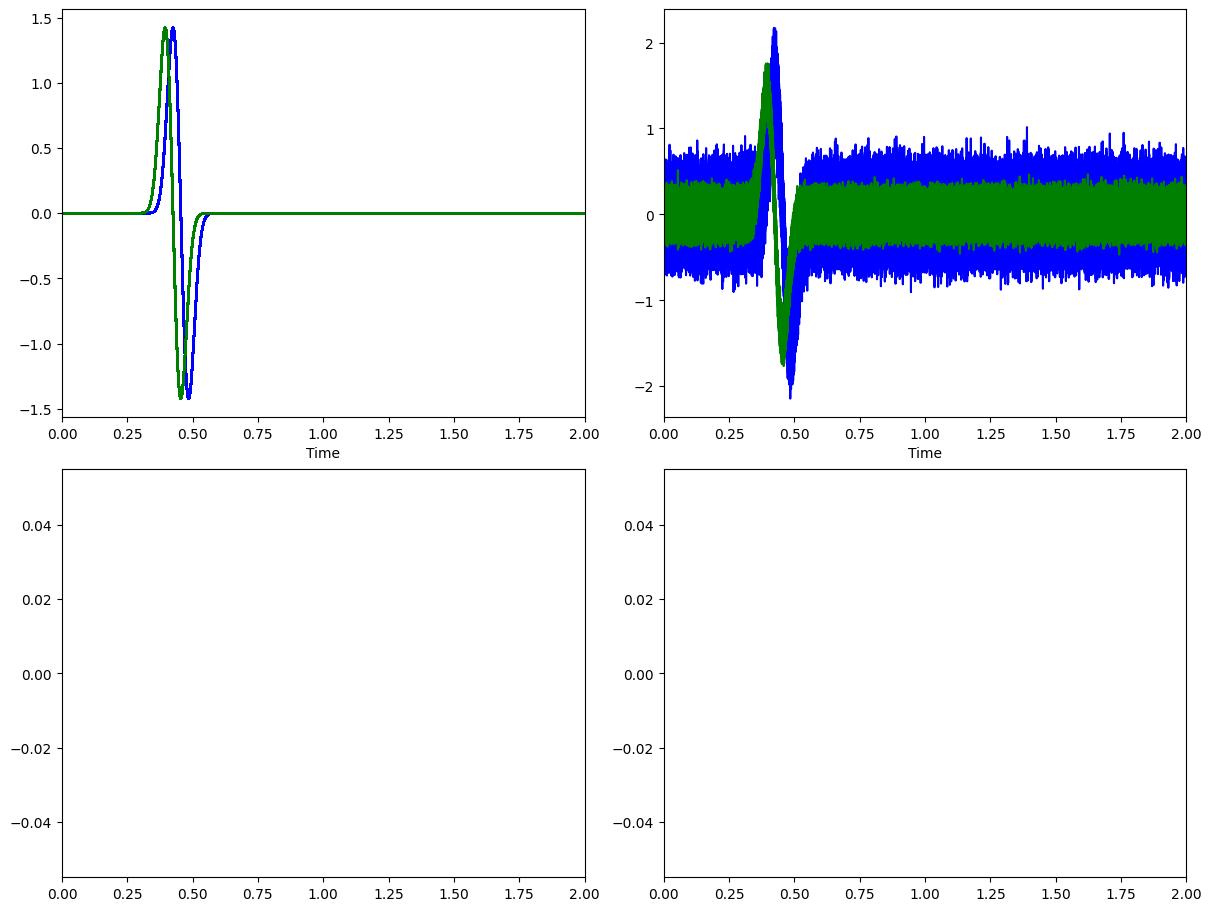

In [19]:
sampling_frequency = 1000
time_extent = (0, 2)
n_trials = 500
time_halfbandwidth_product = 1

n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples)

signal1 = (
    scipy.stats.norm.pdf(time, 0.43, 0.025) - scipy.stats.norm.pdf(time, 0.48, 0.025)
) / 10
signal1 = signal1[:, np.newaxis] * np.ones((len(time), n_trials))
signal2 = (
    scipy.stats.norm.pdf(time, 0.40, 0.025) - scipy.stats.norm.pdf(time, 0.45, 0.025)
) / 10
signal2 = signal2[:, np.newaxis] * np.ones((len(time), n_trials))

noise1 = np.random.normal(0, 0.2, size=(len(time), n_trials))
noise2 = np.random.normal(0, 0.1, size=(len(time), n_trials))
data1 = signal1 + noise1
data2 = signal2 + noise2

signals = np.stack((signal1, signal2), axis=-1)
data = np.stack((data1, data2), axis=-1)

fig, axis_handles = plt.subplots(2, 2, figsize=(12, 9), constrained_layout=True)
axis_handles[0, 0].plot(time, signal1, color="blue")
axis_handles[0, 0].plot(time, signal2, color="green")
axis_handles[0, 0].set_xlabel("Time")
axis_handles[0, 0].set_xlim(time_extent)

axis_handles[0, 1].plot(time, data1, color="blue")
axis_handles[0, 1].plot(time, data2, color="green")
axis_handles[0, 1].set_xlabel("Time")
axis_handles[0, 1].set_xlim(time_extent)

multitaper = Multitaper(
    signals,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.500,
    time_window_step=0.100,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)

delay, slope, r_value = connectivity.group_delay(
    frequencies_of_interest=[0, 15],
    frequency_resolution=multitaper.frequency_resolution,
)
axis_handles[1, 0].plot(
    connectivity.time + multitaper.time_window_duration / 2, delay[..., 0, 1]
)
axis_handles[1, 0].set_xlim(time_extent)

multitaper = Multitaper(
    data,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.500,
    time_window_step=0.100,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)

delay, slope, r_value = connectivity.group_delay(
    frequencies_of_interest=[0, 15],
    frequency_resolution=multitaper.frequency_resolution,
)
axis_handles[1, 1].plot(
    connectivity.time + multitaper.time_window_duration / 2, delay[..., 0, 1]
)
axis_handles[1, 1].set_xlim(time_extent)

## Phase Slope Index

#### Signal \#1 leads Signal \#2

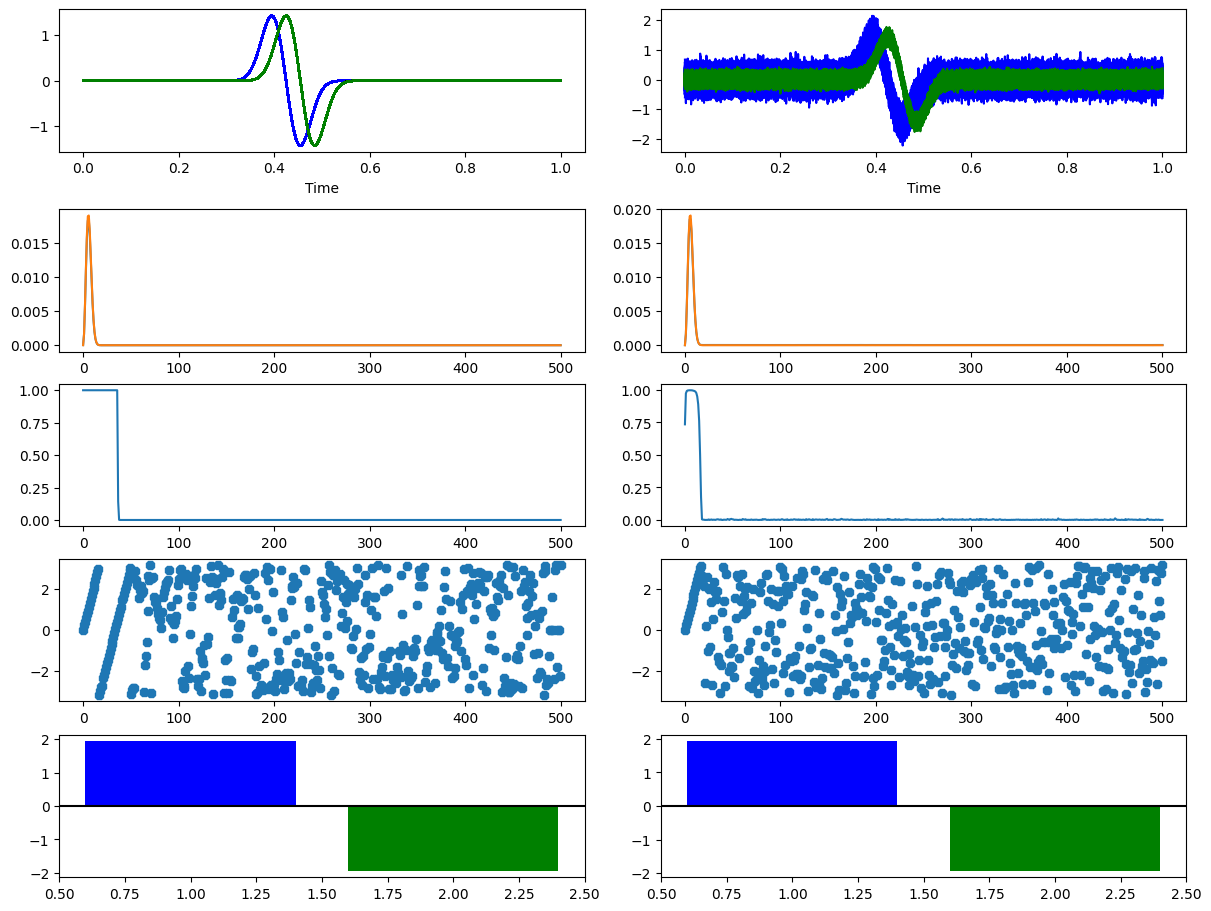

In [20]:
sampling_frequency = 1000
time_extent = (0, 1)
n_trials = 500
time_halfbandwidth_product = 1

n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples)

signal1 = (
    scipy.stats.norm.pdf(time, 0.40, 0.025) - scipy.stats.norm.pdf(time, 0.45, 0.025)
) / 10
signal1 = signal1[:, np.newaxis] * np.ones((len(time), n_trials))
signal2 = (
    scipy.stats.norm.pdf(time, 0.43, 0.025) - scipy.stats.norm.pdf(time, 0.48, 0.025)
) / 10
signal2 = signal2[:, np.newaxis] * np.ones((len(time), n_trials))

noise1 = np.random.normal(0, 0.2, size=(len(time), n_trials))
noise2 = np.random.normal(0, 0.1, size=(len(time), n_trials))
data1 = signal1 + noise1
data2 = signal2 + noise2

signals = np.stack((signal1, signal2), axis=-1)
data = np.stack((data1, data2), axis=-1)

fig, axis_handles = plt.subplots(5, 2, figsize=(12, 9), constrained_layout=True)
axis_handles[0, 0].plot(time, signal1, color="blue")
axis_handles[0, 0].plot(time, signal2, color="green")
axis_handles[0, 0].set_xlabel("Time")

axis_handles[0, 1].plot(time, data1, color="blue")
axis_handles[0, 1].plot(time, data2, color="green")
axis_handles[0, 1].set_xlabel("Time")

multitaper = Multitaper(
    signals,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)

axis_handles[1, 0].plot(
    connectivity.frequencies, connectivity.power()[..., 0].squeeze()
)
axis_handles[1, 0].plot(
    connectivity.frequencies, connectivity.power()[..., 1].squeeze()
)
axis_handles[2, 0].plot(
    connectivity.frequencies, connectivity.coherence_magnitude()[..., 0, 1].squeeze()
)
axis_handles[3, 0].plot(
    connectivity.frequencies,
    connectivity.coherence_phase()[..., 0, 1].squeeze(),
    linestyle="None",
    marker="8",
)

psi = connectivity.phase_slope_index(
    frequencies_of_interest=[2, 10],
    frequency_resolution=multitaper.frequency_resolution,
)
axis_handles[4, 0].bar(
    [1, 2], [psi[..., 0, 1].squeeze(), psi[..., 1, 0].squeeze()], color=["b", "g"]
)
axis_handles[4, 0].set_xlim((0.5, 2.5))
axis_handles[4, 0].axhline(0, color="black")

multitaper = Multitaper(
    data,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)

axis_handles[1, 1].plot(
    connectivity.frequencies, connectivity.power()[..., 0].squeeze()
)
axis_handles[1, 1].plot(
    connectivity.frequencies, connectivity.power()[..., 1].squeeze()
)
axis_handles[2, 1].plot(
    connectivity.frequencies, connectivity.coherence_magnitude()[..., 0, 1].squeeze()
)
axis_handles[3, 1].plot(
    connectivity.frequencies,
    connectivity.coherence_phase()[..., 0, 1].squeeze(),
    linestyle="None",
    marker="8",
)

psi = connectivity.phase_slope_index(
    frequencies_of_interest=[2, 10],
    frequency_resolution=multitaper.frequency_resolution,
)
axis_handles[4, 1].bar(
    [1, 2], [psi[..., 0, 1].squeeze(), psi[..., 1, 0].squeeze()], color=["b", "g"]
)
axis_handles[4, 1].set_xlim((0.5, 2.5))
axis_handles[4, 1].axhline(0, color="black")

#### Signal \#2 leads Signal \#1

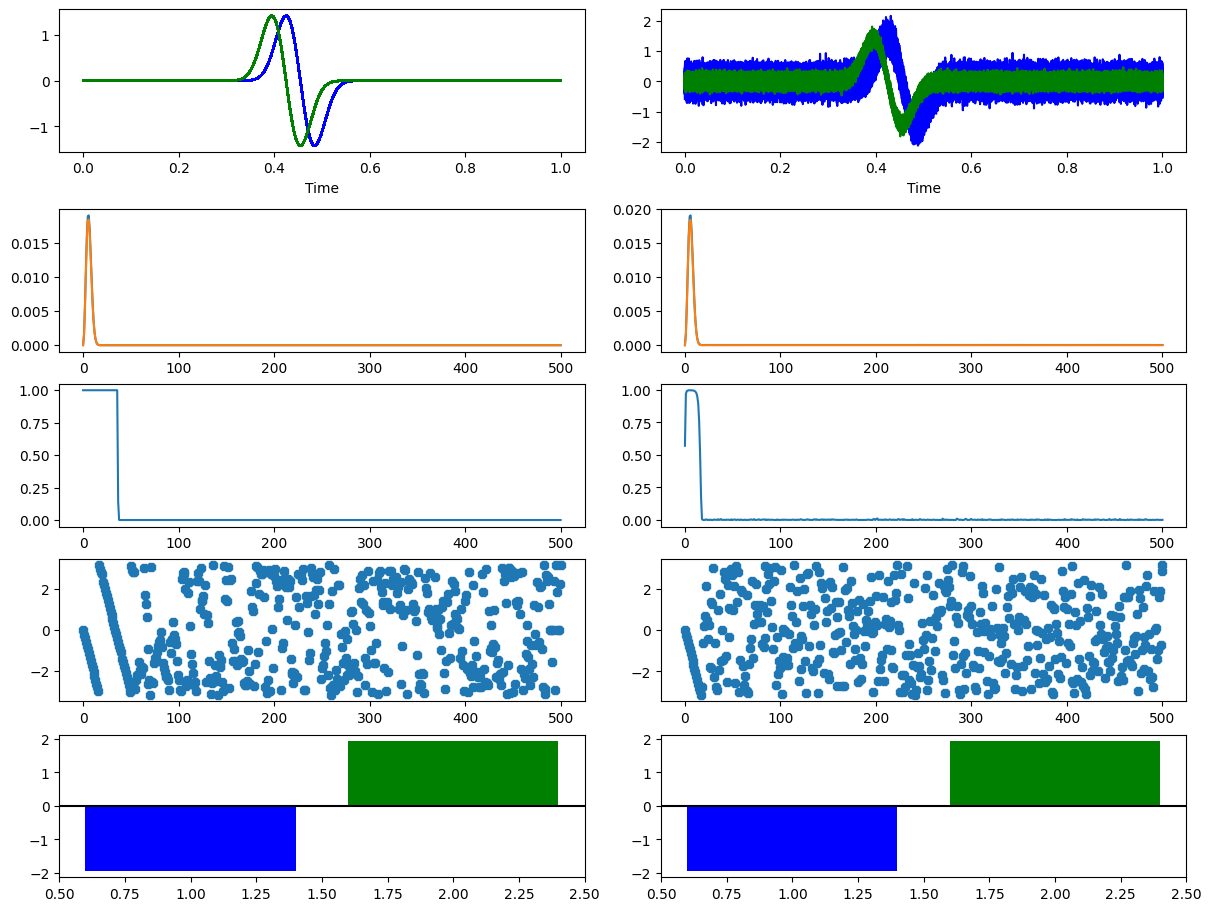

In [21]:
sampling_frequency = 1000
time_extent = (0, 1)
n_trials = 500
time_halfbandwidth_product = 1

n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples)

signal1 = (
    scipy.stats.norm.pdf(time, 0.43, 0.025) - scipy.stats.norm.pdf(time, 0.48, 0.025)
) / 10
signal1 = signal1[:, np.newaxis] * np.ones((len(time), n_trials))
signal2 = (
    scipy.stats.norm.pdf(time, 0.40, 0.025) - scipy.stats.norm.pdf(time, 0.45, 0.025)
) / 10
signal2 = signal2[:, np.newaxis] * np.ones((len(time), n_trials))

noise1 = np.random.normal(0, 0.2, size=(len(time), n_trials))
noise2 = np.random.normal(0, 0.1, size=(len(time), n_trials))
data1 = signal1 + noise1
data2 = signal2 + noise2

signals = np.stack((signal1, signal2), axis=-1)
data = np.stack((data1, data2), axis=-1)

fig, axis_handles = plt.subplots(5, 2, figsize=(12, 9), constrained_layout=True)
axis_handles[0, 0].plot(time, signal1, color="blue")
axis_handles[0, 0].plot(time, signal2, color="green")
axis_handles[0, 0].set_xlabel("Time")

axis_handles[0, 1].plot(time, data1, color="blue")
axis_handles[0, 1].plot(time, data2, color="green")
axis_handles[0, 1].set_xlabel("Time")

multitaper = Multitaper(
    signals,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)

axis_handles[1, 0].plot(
    connectivity.frequencies, connectivity.power()[..., 0].squeeze()
)
axis_handles[1, 0].plot(
    connectivity.frequencies, connectivity.power()[..., 1].squeeze()
)
axis_handles[2, 0].plot(
    connectivity.frequencies, connectivity.coherence_magnitude()[..., 0, 1].squeeze()
)
axis_handles[3, 0].plot(
    connectivity.frequencies,
    connectivity.coherence_phase()[..., 0, 1].squeeze(),
    linestyle="None",
    marker="8",
)

psi = connectivity.phase_slope_index(
    frequencies_of_interest=[2, 10],
    frequency_resolution=multitaper.frequency_resolution,
)
axis_handles[4, 0].bar(
    [1, 2], [psi[..., 0, 1].squeeze(), psi[..., 1, 0].squeeze()], color=["b", "g"]
)
axis_handles[4, 0].set_xlim((0.5, 2.5))
axis_handles[4, 0].axhline(0, color="black")

multitaper = Multitaper(
    data,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)

axis_handles[1, 1].plot(
    connectivity.frequencies, connectivity.power()[..., 0].squeeze()
)
axis_handles[1, 1].plot(
    connectivity.frequencies, connectivity.power()[..., 1].squeeze()
)
axis_handles[2, 1].plot(
    connectivity.frequencies, connectivity.coherence_magnitude()[..., 0, 1].squeeze()
)
axis_handles[3, 1].plot(
    connectivity.frequencies,
    connectivity.coherence_phase()[..., 0, 1].squeeze(),
    linestyle="None",
    marker="8",
)

psi = connectivity.phase_slope_index(
    frequencies_of_interest=[2, 10],
    frequency_resolution=multitaper.frequency_resolution,
)
axis_handles[4, 1].bar(
    [1, 2], [psi[..., 0, 1].squeeze(), psi[..., 1, 0].squeeze()], color=["b", "g"]
)
axis_handles[4, 1].set_xlim((0.5, 2.5))
axis_handles[4, 1].axhline(0, color="black")

Text(0, 0.5, 'Phase Slope Index')

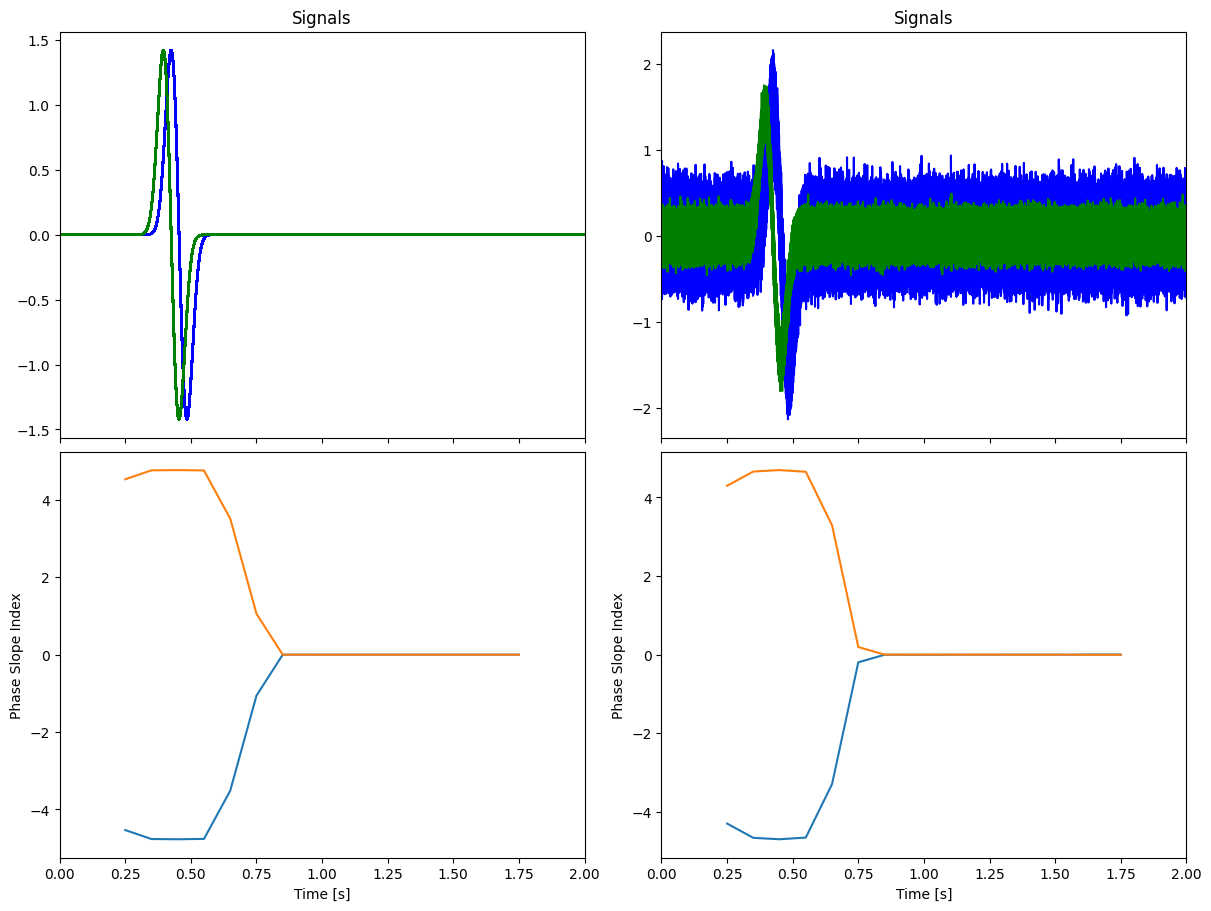

In [22]:
sampling_frequency = 1000
time_extent = (0, 2)
n_trials = 500
time_halfbandwidth_product = 1

n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples)

signal1 = (
    scipy.stats.norm.pdf(time, 0.43, 0.025) - scipy.stats.norm.pdf(time, 0.48, 0.025)
) / 10
signal1 = signal1[:, np.newaxis] * np.ones((len(time), n_trials))
signal2 = (
    scipy.stats.norm.pdf(time, 0.40, 0.025) - scipy.stats.norm.pdf(time, 0.45, 0.025)
) / 10
signal2 = signal2[:, np.newaxis] * np.ones((len(time), n_trials))

noise1 = np.random.normal(0, 0.2, size=(len(time), n_trials))
noise2 = np.random.normal(0, 0.1, size=(len(time), n_trials))
data1 = signal1 + noise1
data2 = signal2 + noise2

signals = np.stack((signal1, signal2), axis=-1)
data = np.stack((data1, data2), axis=-1)

fig, axis_handles = plt.subplots(
    2, 2, figsize=(12, 9), constrained_layout=True, sharex=True
)
axis_handles[0, 0].plot(time, signal1, color="blue")
axis_handles[0, 0].plot(time, signal2, color="green")
axis_handles[0, 0].set_title("Signals")
axis_handles[0, 0].set_xlim(time_extent)

axis_handles[0, 1].plot(time, data1, color="blue")
axis_handles[0, 1].plot(time, data2, color="green")
axis_handles[0, 1].set_title("Signals")
axis_handles[0, 1].set_xlim(time_extent)

multitaper = Multitaper(
    signals,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.500,
    time_window_step=0.100,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)

psi = connectivity.phase_slope_index(
    frequencies_of_interest=[0, 15],
    frequency_resolution=multitaper.frequency_resolution,
)
axis_handles[1, 0].plot(
    connectivity.time + multitaper.time_window_duration / 2,
    psi[..., 0, 1],
    connectivity.time + multitaper.time_window_duration / 2,
    psi[..., 1, 0],
)
axis_handles[1, 0].set_xlim(time_extent)
axis_handles[1, 0].set_xlabel("Time [s]")
axis_handles[1, 0].set_ylabel("Phase Slope Index")

multitaper = Multitaper(
    data,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.500,
    time_window_step=0.100,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)

psi = connectivity.phase_slope_index(
    frequencies_of_interest=[0, 15],
    frequency_resolution=multitaper.frequency_resolution,
)
axis_handles[1, 1].plot(
    connectivity.time + multitaper.time_window_duration / 2,
    psi[..., 0, 1],
    connectivity.time + multitaper.time_window_duration / 2,
    psi[..., 1, 0],
)
axis_handles[1, 1].set_xlim(time_extent)
axis_handles[1, 1].set_xlabel("Time [s]")
axis_handles[1, 1].set_ylabel("Phase Slope Index")

## Canonical Coherence

The advantage of canonical coherence is that it can be more statistically powerful than coherence because it is combining coherence from groups.

frequency resolution: 50.0


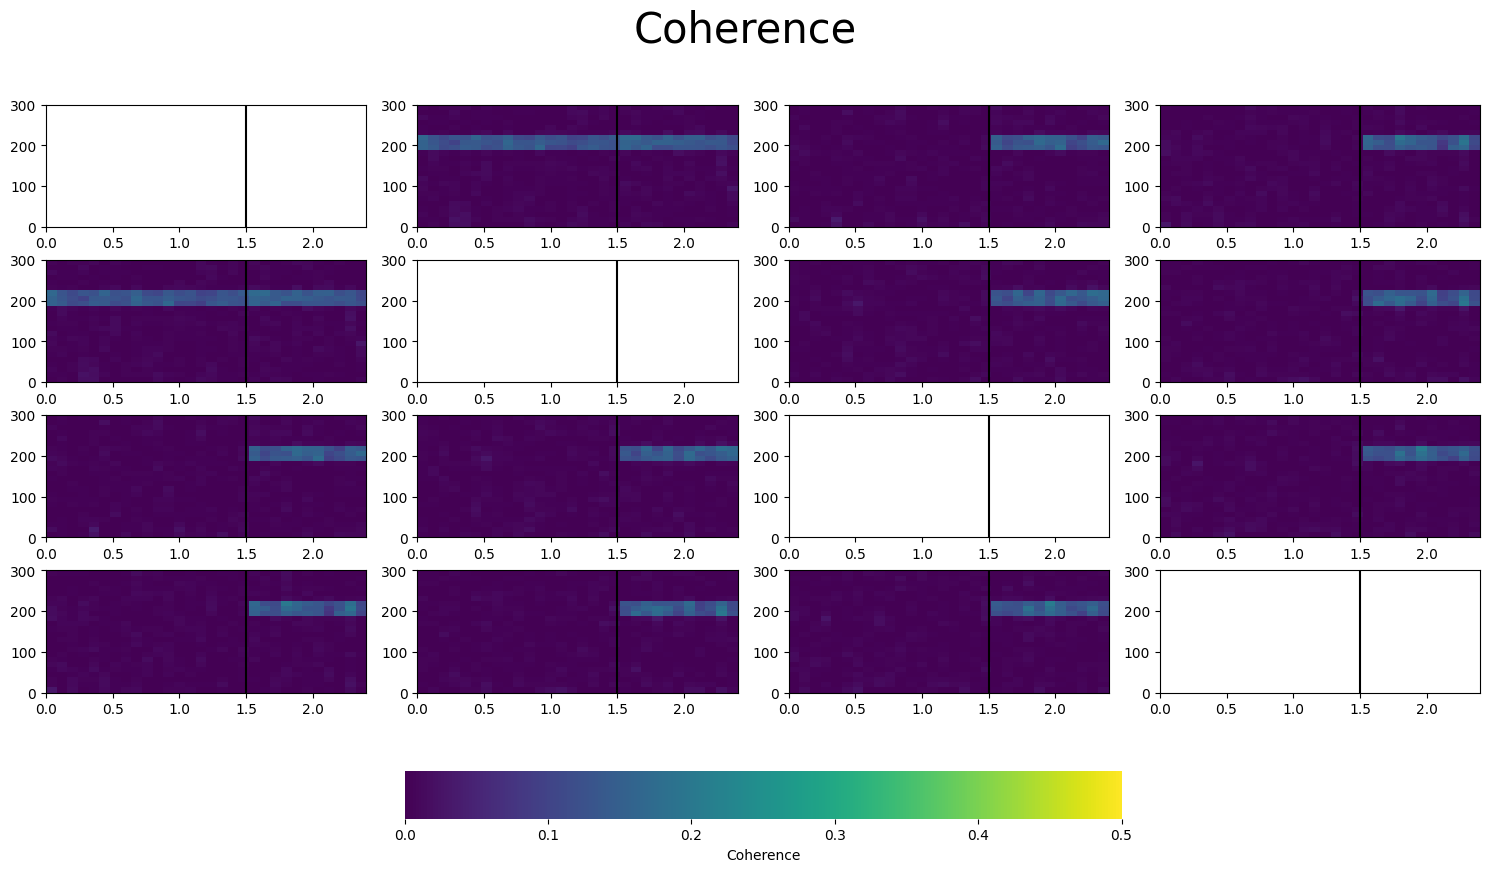

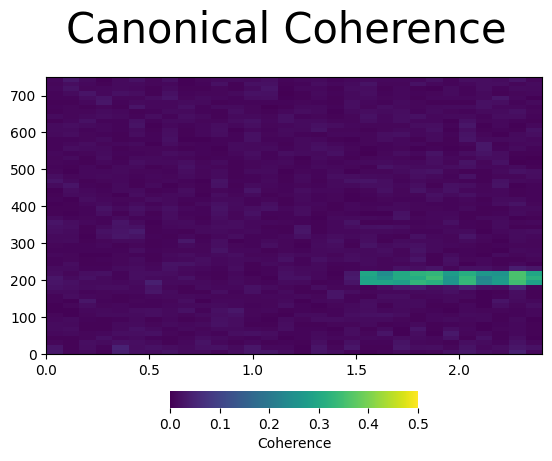

In [23]:
from itertools import product

time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 4
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)

signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0:2] = np.sin(2 * np.pi * time * frequency_of_interest)[
    :, np.newaxis, np.newaxis
] * np.ones((1, n_trials, 2))

other_signals = (n_signals + 1) // 2
n_other_signals = n_signals - other_signals
phase_offset = np.random.uniform(
    -np.pi, np.pi, size=(n_time_samples, n_trials, n_other_signals)
)
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, other_signals:] = np.sin(
    (2 * np.pi * time[:, np.newaxis, np.newaxis] * frequency_of_interest) + phase_offset
)
noise = np.random.normal(0, 4, signal.shape)


multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)

time_grid, freq_grid = np.meshgrid(
    np.append(connectivity.time, time_extent[-1]),
    np.append(connectivity.frequencies, multitaper.nyquist_frequency),
)

fig, axes = plt.subplots(nrows=n_signals, ncols=n_signals, figsize=(15, 9))
meshes = []
for ind1, ind2 in product(range(n_signals), range(n_signals)):
    if ind1 == ind2:
        vmin, vmax = connectivity.power().min(), connectivity.power().max()
    else:
        vmin, vmax = 0, 0.5
    mesh = axes[ind1, ind2].pcolormesh(
        time_grid,
        freq_grid,
        connectivity.coherence_magnitude()[..., ind1, ind2].squeeze().T,
        vmin=vmin,
        vmax=vmax,
        cmap="viridis",
    )
    meshes.append(mesh)
    axes[ind1, ind2].set_ylim((0, 300))
    axes[ind1, ind2].set_xlim(time_extent)
    axes[ind1, ind2].axvline(1.5, color="black")

plt.suptitle("Coherence", y=1.02, fontsize=30)
plt.tight_layout()
cb = fig.colorbar(
    meshes[-2],
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Coherence",
)
cb.outline.set_linewidth(0)
print(f"frequency resolution: {multitaper.frequency_resolution}")


group_labels = (["a"] * (n_signals - n_other_signals)) + (["b"] * n_other_signals)
canonical_coherence, pair_labels = connectivity.canonical_coherence(group_labels)
fig = plt.figure()
mesh = plt.pcolormesh(
    time_grid,
    freq_grid,
    canonical_coherence[..., 0, 1].squeeze().T,
    vmin=0,
    vmax=0.5,
    cmap="viridis",
)
plt.suptitle("Canonical Coherence", y=1.02, fontsize=30)
cb = fig.colorbar(
    mesh,
    ax=plt.gca(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Coherence",
)
cb.outline.set_linewidth(0)

#### More signals, higher noise

frequency resolution: 50.0


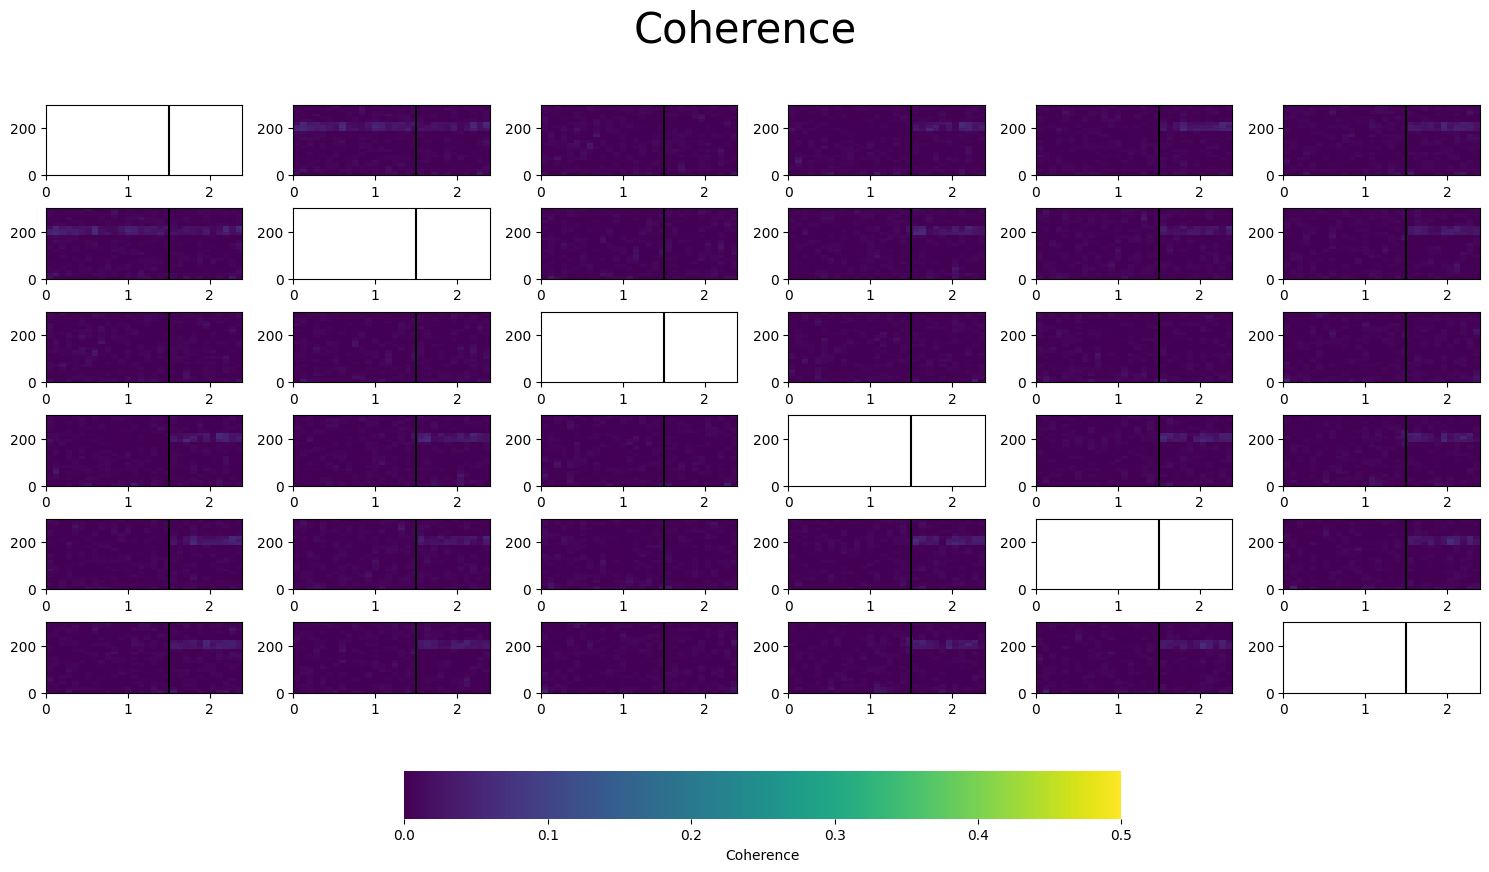

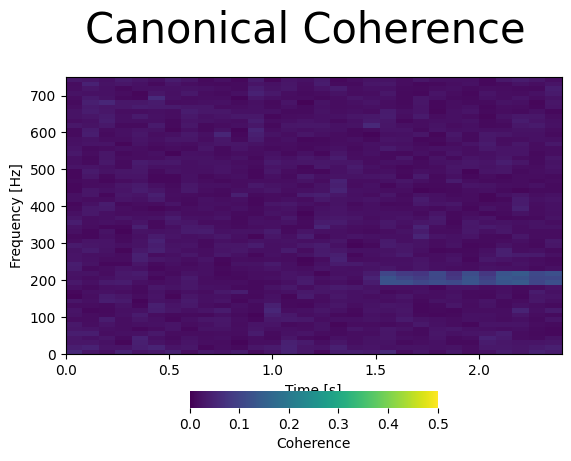

In [24]:
from itertools import product

time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 6
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)

signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0:2] = np.sin(2 * np.pi * time * frequency_of_interest)[
    :, np.newaxis, np.newaxis
] * np.ones((1, n_trials, 2))

other_signals = (n_signals + 1) // 2
n_other_signals = n_signals - other_signals
phase_offset = np.random.uniform(
    -np.pi, np.pi, size=(n_time_samples, n_trials, n_other_signals)
)
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, other_signals:] = np.sin(
    (2 * np.pi * time[:, np.newaxis, np.newaxis] * frequency_of_interest) + phase_offset
)
noise = np.random.normal(10, 7, signal.shape)


multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)

time_grid, freq_grid = np.meshgrid(
    np.append(connectivity.time, time_extent[-1]),
    np.append(connectivity.frequencies, multitaper.nyquist_frequency),
)

fig, axes = plt.subplots(nrows=n_signals, ncols=n_signals, figsize=(15, 9))
meshes = []
for ind1, ind2 in product(range(n_signals), range(n_signals)):
    if ind1 == ind2:
        vmin, vmax = connectivity.power().min(), connectivity.power().max()
    else:
        vmin, vmax = 0, 0.5
    mesh = axes[ind1, ind2].pcolormesh(
        time_grid,
        freq_grid,
        connectivity.coherence_magnitude()[..., ind1, ind2].squeeze().T,
        vmin=vmin,
        vmax=vmax,
        cmap="viridis",
    )
    meshes.append(mesh)
    axes[ind1, ind2].set_ylim((0, 300))
    axes[ind1, ind2].set_xlim(time_extent)
    axes[ind1, ind2].axvline(1.5, color="black")

plt.suptitle("Coherence", y=1.02, fontsize=30)
plt.tight_layout()
cb = fig.colorbar(
    meshes[-2],
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Coherence",
)
cb.outline.set_linewidth(0)
print(f"frequency resolution: {multitaper.frequency_resolution}")


group_labels = (["a"] * (n_signals - n_other_signals)) + (["b"] * n_other_signals)
canonical_coherence, pair_labels = connectivity.canonical_coherence(group_labels)
fig = plt.figure()
mesh = plt.pcolormesh(
    time_grid,
    freq_grid,
    canonical_coherence[..., 0, 1].squeeze().T,
    vmin=0,
    vmax=0.5,
    cmap="viridis",
)
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.suptitle("Canonical Coherence", y=1.02, fontsize=30)
cb = fig.colorbar(
    mesh,
    ax=plt.gca(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Coherence",
)
cb.outline.set_linewidth(0)

## Global Coherence

Global coherence finds the linear combinations of signals that maximizes the power at a given frequency.

(30, 120, 1)


TypeError: Dimensions of C (60, 30) should be one smaller than X(31) and Y(62) while using shading='flat' see help(pcolormesh)

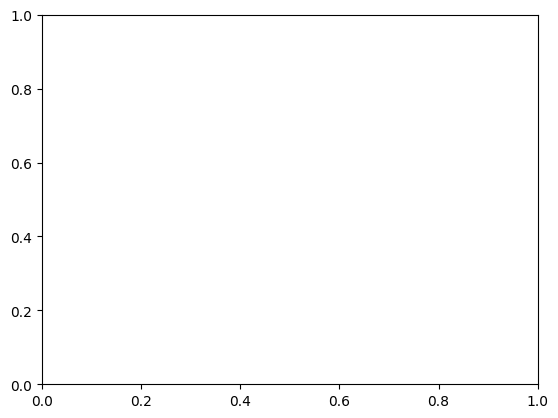

In [25]:
from itertools import product

time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 6
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)

signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0:2] = np.sin(2 * np.pi * time * frequency_of_interest)[
    :, np.newaxis, np.newaxis
] * np.ones((1, n_trials, 2))

other_signals = (n_signals + 1) // 2
n_other_signals = n_signals - other_signals
phase_offset = np.random.uniform(
    -np.pi, np.pi, size=(n_time_samples, n_trials, n_other_signals)
)
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, other_signals:] = np.sin(
    (2 * np.pi * time[:, np.newaxis, np.newaxis] * frequency_of_interest) + phase_offset
)
noise = np.random.normal(10, 7, signal.shape)


multitaper = Multitaper(
    prepare_time_series(signal + noise),
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)

global_coherence, unnormalized_global_coherence = connectivity.global_coherence()
print(global_coherence.shape)  # n_time, n_frequencies, n_components

# Extract non-negative frequencies (first N//2+1 frequencies)
n_nonneg_freqs = len(connectivity.frequencies)
global_coherence_nonneg = global_coherence[:, :n_nonneg_freqs, 0].T  # (freqs, time)

time_grid, freq_grid = np.meshgrid(
    np.append(connectivity.time, time_extent[-1]),
    np.append(connectivity.frequencies, connectivity.frequencies[-1]),  # Add edge for pcolormesh
)
plt.figure()
plt.pcolormesh(
    time_grid,
    freq_grid,
    global_coherence_nonneg,
    shading="flat",
)
plt.title("Global Coherence (1st component)")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")

## Xarray interface

The xarray interface provides three things:
1. a nicely labeled output for the connectivity dimensions
2. a unified way of estimating the spectral power and connectivity together.
3. easy and quick plotting

In [ ]:
coherence_magnitude = multitaper_connectivity(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    method="coherence_magnitude",
)

coherence_magnitude

<xarray.DataArray 'coherence_magnitude' (time: 30, frequency: 60, source: 6,
                                         target: 6)> Size: 518kB
array([[[[           nan, 2.28357433e-05, 2.61276066e-03,
          1.55847483e-03, 9.09496426e-04, 8.92499229e-04],
         [2.28357433e-05,            nan, 7.72078894e-03,
          1.29047804e-03, 9.84411584e-05, 8.34242613e-03],
         [2.61276066e-03, 7.72078894e-03,            nan,
          1.27765799e-03, 2.36684220e-02, 7.05345148e-04],
         [1.55847483e-03, 1.29047804e-03, 1.27765799e-03,
                     nan, 2.24110358e-04, 1.28839566e-03],
         [9.09496426e-04, 9.84411584e-05, 2.36684220e-02,
          2.24110358e-04,            nan, 1.43052589e-03],
         [8.92499229e-04, 8.34242613e-03, 7.05345148e-04,
          1.28839566e-03, 1.43052589e-03,            nan]],

        [[           nan, 1.17489972e-03, 2.24104818e-03,
          6.10546983e-04, 2.29498488e-03, 2.30117600e-03],
         [1.17489972e-03,            nan, 2.43195470e-03,
          8.40454759e-04, 1.96812235e-03, 4.81688929e-03],
         [2.24104818e-03, 2.43195470e-03,            nan,
          2.71163528e-03, 1.09013508e-02, 2.07073127e-03],
         [6.10546983e-04, 8.40454759e-04, 2.71163528e-03,
...
         [7.10037166e-03, 1.03060238e-03, 3.53426685e-03,
                     nan, 2.06419400e-02, 2.97295857e-03],
         [1.34566663e-02, 4.91732014e-03, 2.00854946e-04,
          2.06419400e-02,            nan, 7.33829313e-04],
         [2.30475328e-03, 9.38527186e-04, 3.73885728e-03,
          2.97295857e-03, 7.33829313e-04,            nan]],

        [[           nan, 4.64306197e-04, 2.19083391e-03,
          4.16032356e-03, 1.62437163e-03, 1.92763334e-03],
         [4.64306197e-04,            nan, 5.95911926e-03,
          5.48007768e-04, 2.28588603e-03, 7.98343078e-04],
         [2.19083391e-03, 5.95911926e-03,            nan,
          2.17785764e-03, 7.48201408e-03, 2.21490849e-03],
         [4.16032356e-03, 5.48007768e-04, 2.17785764e-03,
                     nan, 9.35345470e-03, 1.36561929e-03],
         [1.62437163e-03, 2.28588603e-03, 7.48201408e-03,
          9.35345470e-03,            nan, 2.18698309e-03],
         [1.92763334e-03, 7.98343078e-04, 2.21490849e-03,
          1.36561929e-03, 2.18698309e-03,            nan]]]],
      shape=(30, 60, 6, 6))
Coordinates:
  * time       (time) float64 240B 0.0 0.08 0.16 0.24 ... 2.08 2.16 2.24 2.32
  * frequency  (frequency) float64 480B 0.0 12.5 25.0 37.5 ... 712.5 725.0 737.5
  * source     (source) <U1 24B '0' '1' '2' '3' '4' '5'
  * target     (target) <U1 24B '0' '1' '2' '3' '4' '5'
Attributes: (12/15)
    mt_detrend_type:                constant
    mt_frequency_resolution:        50.0
    mt_is_low_bias:                 True
    mt_n_fft_samples:               120
    mt_n_signals:                   6
    mt_n_tapers:                    3
    ...                             ...
    mt_nyquist_frequency:           750.0
    mt_sampling_frequency:          1500
    mt_start_time:                  0
    mt_time_halfbandwidth_product:  2
    mt_time_window_duration:        0.08
    mt_time_window_step:            0.08

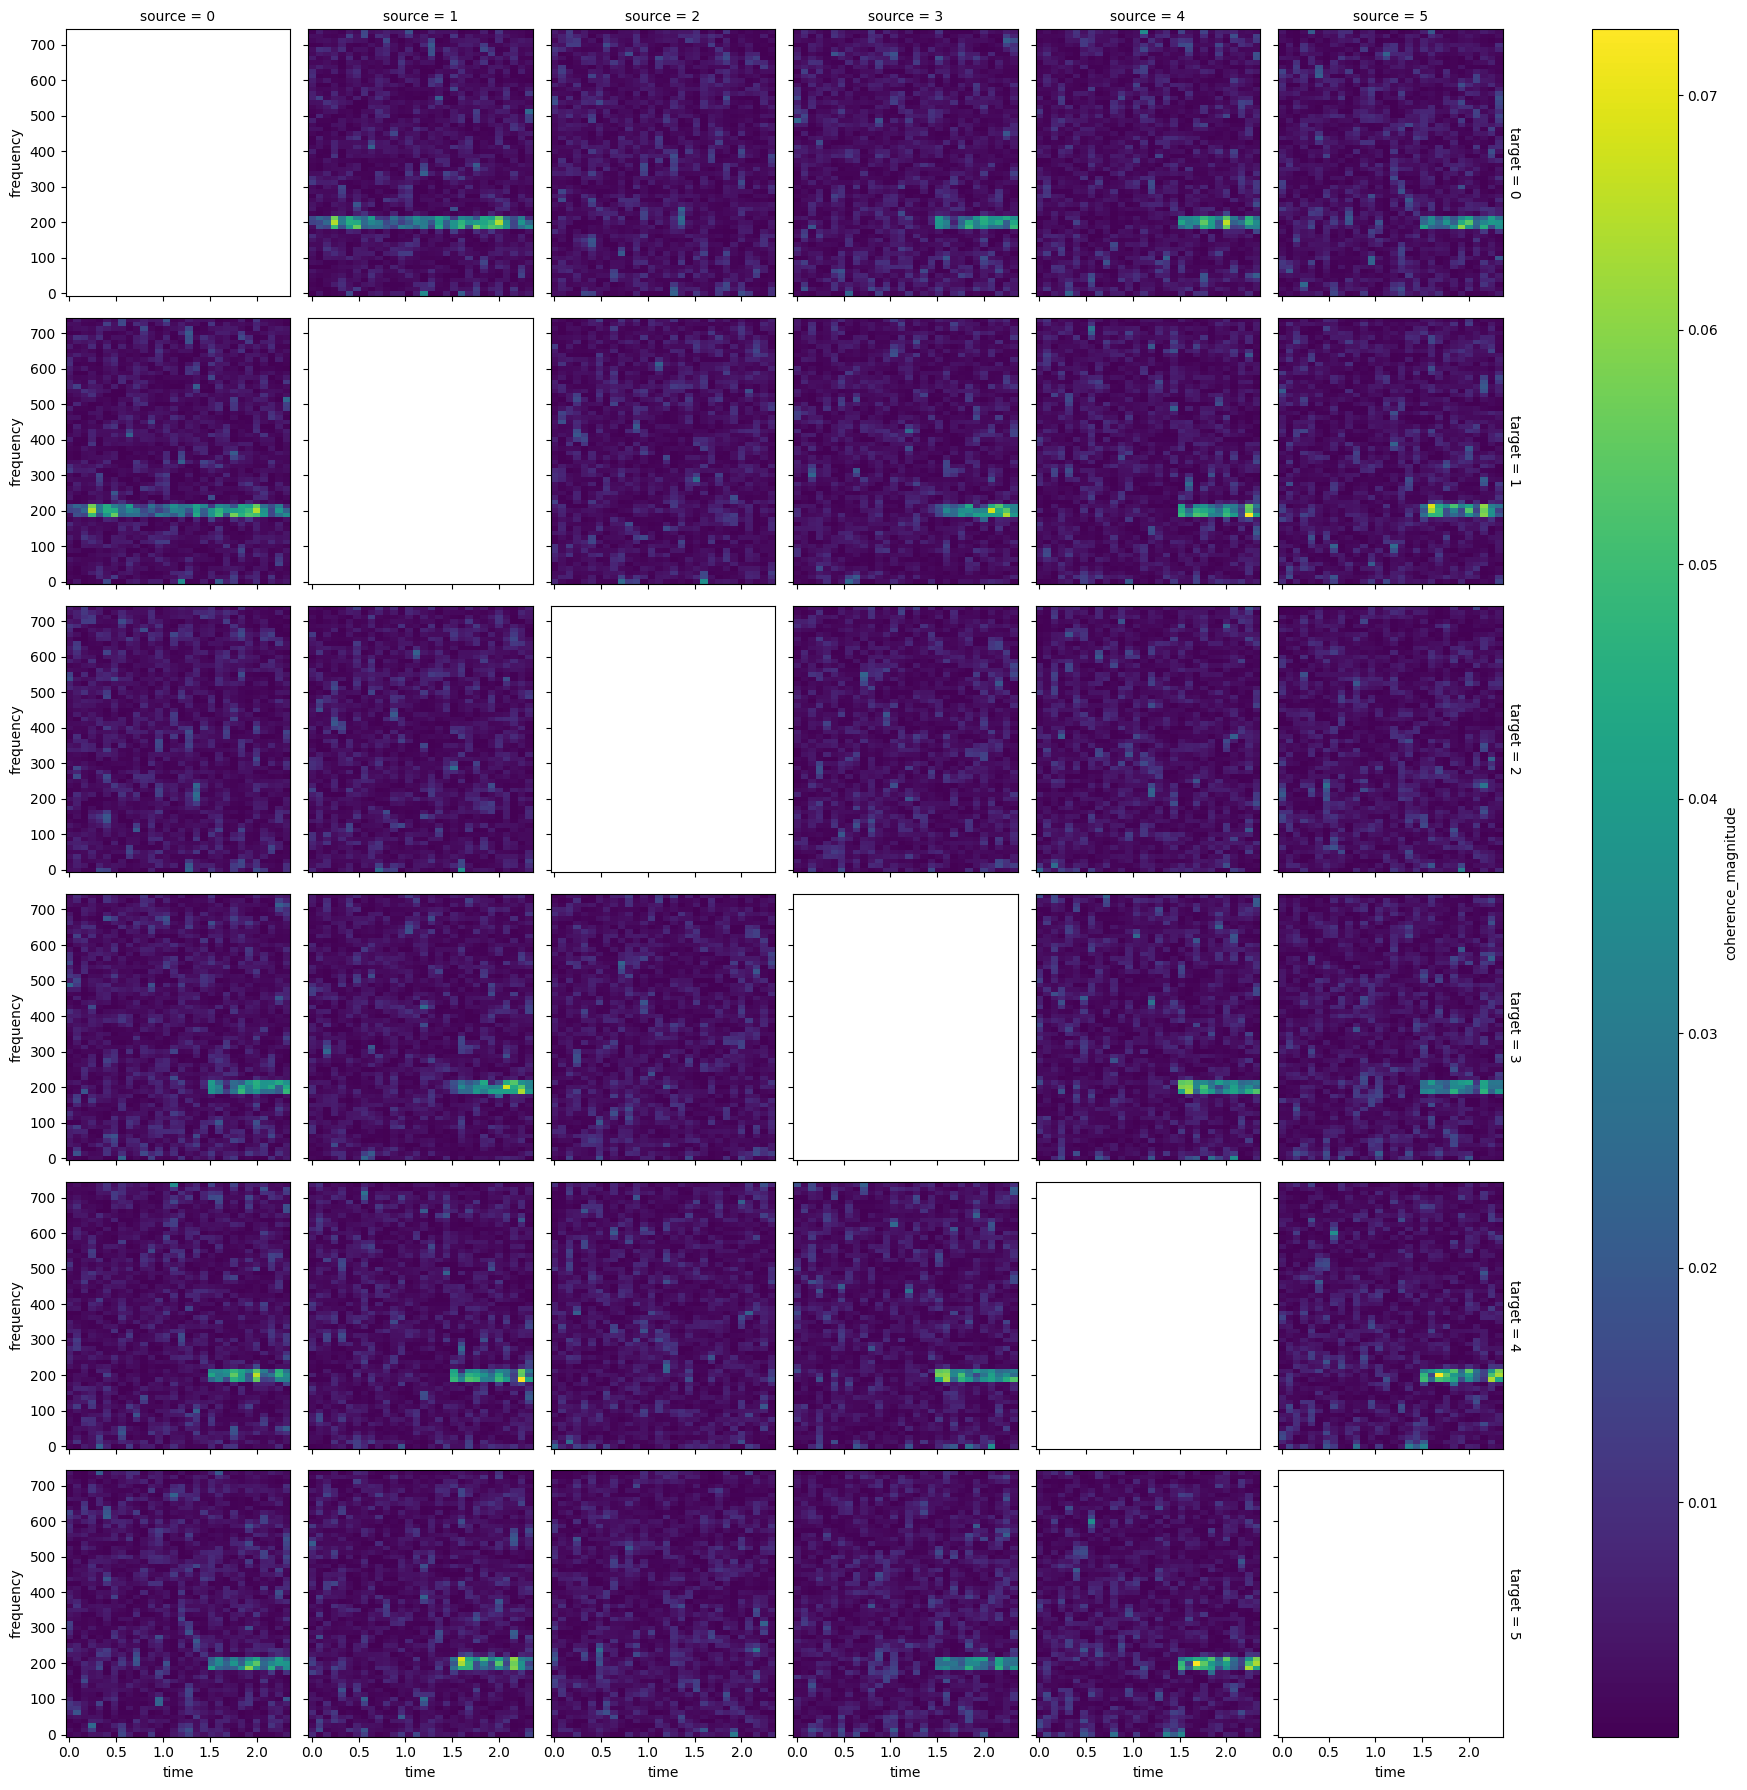

In [ ]:
coherence_magnitude.plot(col="source", row="target", x="time")